In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pandas import DataFrame
import sklearn
from sklearn.metrics import mean_squared_error

import ase
from ase import io

import glob

#Settings


In [2]:
#Colour settings / markers

#Colours
Si_c = 'r'
O_c = 'b'

c_1 = 'rebeccapurple'
c_2 = 'seagreen'
c_3 = 'goldenrod'

#Markers
Qu_m = 'x'
Crist_m = 'o'
Coe_m = '^'
Fer_m = 'd'

Rat_m = 's'
HZ_m = 'o'
AM0_m = '^'
AM3_m = 'd'
MD_m = 'p'

#linestle
lin = (0, (5, 5)) #dashed

#marker size
ms_f1 = 8
ms_f2 = 14
mpl.rcParams["savefig.dpi"] = 300

#LR

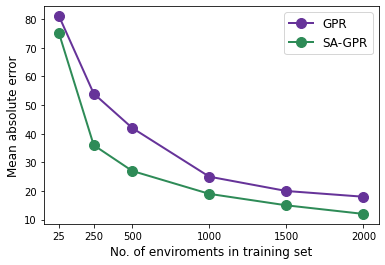

In [13]:
#Raimbault tensor learning curves
plt.style.use('1figure.mplstyle')

x = [25,250,500,1000,1500,2000]
GPR = [81,54,42,25,20,18]
SAGPR = [75,36,27,19,15,12]

plt.plot(x, GPR, marker='o', color=c_1, label='GPR')
plt.plot(x, SAGPR, marker='o', color=c_2, label='SA-GPR')
plt.ylabel('Mean absolute error')
plt.xlabel('No. of enviroments in training set')
plt.legend(prop={'size': 12})
plt.xticks(x)
plt.savefig('Plots/GPR_SAGPR_comp_lit.png')

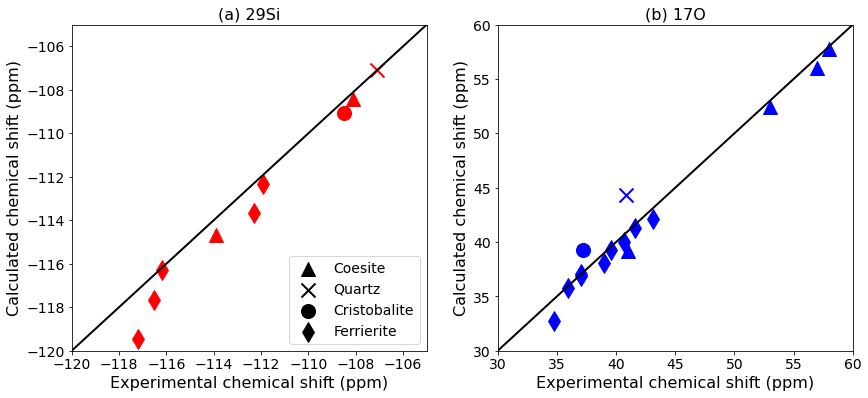

In [3]:
plt.style.use('2figure.mplstyle')

coe_o_ex = [29,41,57,53,58]
coe_o_th = [25.8,39.2,56.0,52.4,57.8]

cr_o_ex = [37.2]
cr_o_th = [39.3]

q_o_ex = [40.8]
q_o_th = [44.3]

fer_o_ex = [43.1,41.6,40.7,39.6,39.0,37.0,37.0,35.9,34.8,28.0]
fer_o_th = [42.1,41.3,40.0,39.3,38.1,36.9,37.1,35.8,32.7,28.2]

coe_si_ex = [-113.9,-108.1]
coe_si_th = [-114.69,-108.41]

cr_si_ex = [-108.5]
cr_si_th = [-109.05]

q_si_ex = [-107.1]
q_si_th = [-107.1]

fer_si_ex = [-116.5,-112.3,-111.9,-117.2,-116.2]
fer_si_th = [-117.67,-113.66,-112.33,-119.45,-116.29]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(coe_si_ex,coe_si_th,marker=Coe_m,color=Si_c)
ax1.scatter(q_si_ex,q_si_th,marker=Qu_m,color=Si_c)
ax1.scatter(cr_si_ex,cr_si_th,marker=Crist_m,color=Si_c)
ax1.scatter(fer_si_ex,fer_si_th,marker=Fer_m,color=Si_c)
ax1.plot([-120,-100],[-120,-100],color='black')
ax1.set_xlim(-120,-105)
ax1.set_ylim(-120,-105)
ax1.set_title('(a) 29Si')
ax1.set_xlabel('Experimental chemical shift (ppm)')
ax1.set_ylabel('Calculated chemical shift (ppm)')

ax1.scatter([],[],marker=Coe_m,color='black', label='Coesite')
ax1.scatter([],[],marker=Qu_m,color='black', label='Quartz')
ax1.scatter([],[],marker=Crist_m,color='black', label='Cristobalite')
ax1.scatter([],[],marker=Fer_m,color='black', label='Ferrierite')
ax1.legend(loc=4, prop={'size': 14})


ax2.scatter(coe_o_ex,coe_o_th,marker=Coe_m,color=O_c)
ax2.scatter(q_o_ex,q_o_th,marker=Qu_m,color=O_c)
ax2.scatter(cr_o_ex,cr_o_th,marker=Crist_m,color=O_c)
ax2.scatter(fer_o_ex,fer_o_th,marker=Fer_m,color=O_c)
ax2.plot([30,60],[30,60],color='black')
ax2.set_xlim(30,60)
ax2.set_ylim(30,60)
ax2.set_title('(b) 17O')
ax2.set_xlabel('Experimental chemical shift (ppm)')
ax2.set_ylabel('Calculated chemical shift (ppm)')


fig.savefig('Plots/comp_to_exp_from_lit')

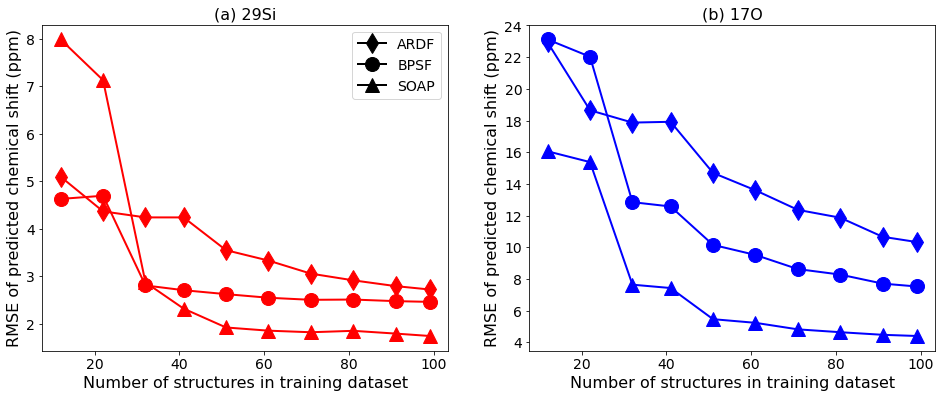

In [23]:
#Comparing descriptor using data from literature
plt.style.use('2figure.mplstyle')
path = 'c9cp02803j1/DESCRIPTORS_DATA_STRUCTURES_AND_CODES/Descriptors_BPSF_ARDF_SOAP_LRR_SiO2_Learning_Curves/'

sizes = [12,22,32,41,51,61,71,81,91,99]
ardf_o = []
bpsf_o = []
soap_o = []


for i in sizes:
    data = np.loadtxt(path + 'RMSE-0_10CV_O_DescsLearn_ARDF_'+str(i)+'_LRR.out')
    ardf_o.append(np.mean(data[2]))
    data = np.loadtxt(path + 'RMSE-0_10CV_O_DescsLearn_BPSF_'+str(i)+'_LRR.out')
    bpsf_o.append(np.mean(data[2]))
    data = np.loadtxt(path + 'RMSE-0_10CV_O_DescsLearn_SOAP_'+str(i)+'_LRR.out')
    soap_o.append(np.mean(data[2]))
    
ardf_si = []
bpsf_si = []
soap_si = []


for i in sizes:
    data = np.loadtxt(path + 'RMSE-0_10CV_Si_DescsLearn_ARDF_'+str(i)+'_LRR.out')
    ardf_si.append(np.mean(data[2]))
    data = np.loadtxt(path + 'RMSE-0_10CV_Si_DescsLearn_BPSF_'+str(i)+'_LRR.out')
    bpsf_si.append(np.mean(data[2]))
    data = np.loadtxt(path + 'RMSE-0_10CV_Si_DescsLearn_SOAP_'+str(i)+'_LRR.out')
    soap_si.append(np.mean(data[2]))
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(sizes, ardf_si, color=Si_c, marker= Fer_m)
ax1.plot(sizes, bpsf_si, color=Si_c, marker= Crist_m)
ax1.plot(sizes, soap_si, color=Si_c, marker= Coe_m)
ax1.set_xlabel('Number of structures in training dataset')
ax1.set_ylabel('RMSE of predicted chemical shift (ppm)')
ax1.set_title('(a) 29Si')

ax1.plot([], [], label='ARDF', color='black', marker= Fer_m)
ax1.plot([], [], label='BPSF', color='black', marker= Crist_m)
ax1.plot([], [], label='SOAP', color='black', marker= Coe_m)
ax1.legend(prop={'size': 14})


ax2.plot(sizes, ardf_o, label='ARDF-O', color=O_c, marker= Fer_m)
ax2.plot(sizes, bpsf_o, label='BPSF-O', color=O_c, marker= Crist_m)
ax2.plot(sizes, soap_o, label='SOAP-O', color=O_c, marker= Coe_m)
ax2.set_yticks(range(4,25,2))
ax2.set_xlabel('Number of structures in training dataset')
ax2.set_ylabel('RMSE of predicted chemical shift (ppm)')
ax2.set_title('(b) 17O')

fig.savefig('Plots/Comparison_descriptor_from_lit.png')

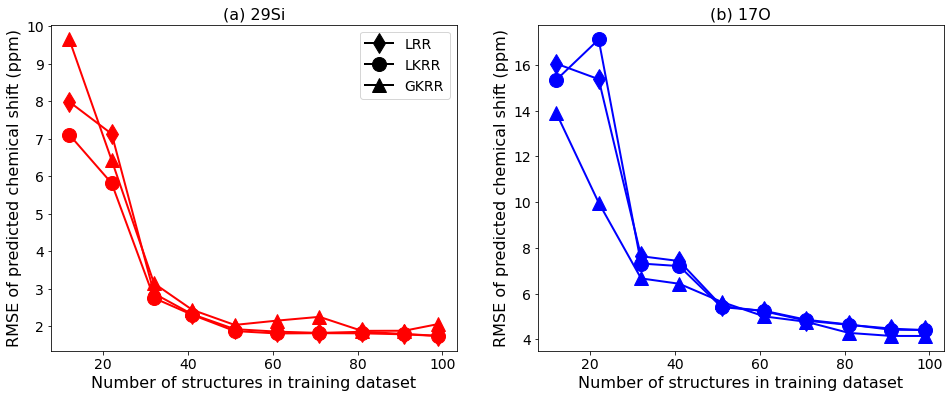

In [24]:
#Comparison for ML schemes from literature
plt.style.use('2figure.mplstyle')
path = 'c9cp02803j1/DESCRIPTORS_DATA_STRUCTURES_AND_CODES/Algorithms_LRR_LKRR_GKRR_SOAP_SiO2_LearningCurves_Construction/'

lrr_o = []
lkrr_o = []
gkrr_o = []

for i in sizes:
    data = np.loadtxt(path + 'RMSE-0_3CV_O_AlgosLearn_SOAP_'+str(i)+'_KRRL.out')
    lkrr_o.append(np.mean(data[2]))
    data = np.loadtxt(path +'RMSE-0_10CV_O_AlgosLearn_SOAP_'+str(i)+'_LRR.out')
    lrr_o.append(np.mean(data[2]))
    data = np.loadtxt(path+'RMSE-0_3CV_O_AlgosLearn_SOAP_'+str(i)+'_KRR.out')
    gkrr_o.append(np.mean(data[2]))
    
#Note that they use different size CV at different points

lrr_si = []
lkrr_si = []
gkrr_si = []

for i in sizes:
    data = np.loadtxt(path + 'RMSE-0_3CV_Si_AlgosLearn_SOAP_'+str(i)+'_KRRL.out')
    lkrr_si.append(np.mean(data[2]))
    data = np.loadtxt(path +'RMSE-0_10CV_Si_AlgosLearn_SOAP_'+str(i)+'_LRR.out')
    lrr_si.append(np.mean(data[2]))
    data = np.loadtxt(path+'RMSE-0_3CV_Si_AlgosLearn_SOAP_'+str(i)+'_KRR.out')
    gkrr_si.append(np.mean(data[2]))

    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(sizes, lrr_si, color=Si_c, marker= Fer_m)
ax1.plot(sizes, lkrr_si, color=Si_c, marker= Crist_m)
ax1.plot(sizes, gkrr_si, color=Si_c, marker= Coe_m)
ax1.set_xlabel('Number of structures in training dataset')
ax1.set_ylabel('RMSE of predicted chemical shift (ppm)')
ax1.set_title('(a) 29Si')

ax1.plot([], [], label='LRR', color='black', marker= Fer_m)
ax1.plot([], [], label='LKRR', color='black', marker= Crist_m)
ax1.plot([], [], label='GKRR', color='black', marker= Coe_m)
ax1.legend(prop={'size': 14})


ax2.plot(sizes, lrr_o, label='ARDF-O', color=O_c, marker= Fer_m)
ax2.plot(sizes, lkrr_o, label='BPSF-O', color=O_c, marker= Crist_m)
ax2.plot(sizes, gkrr_o, label='SOAP-O', color=O_c, marker= Coe_m)

ax2.set_xlabel('Number of structures in training dataset')
ax2.set_ylabel('RMSE of predicted chemical shift (ppm)')
ax2.set_title('(b) 17O')

fig.savefig('Plots/Comparison_ML_algo_from_lit.png')

#Section one

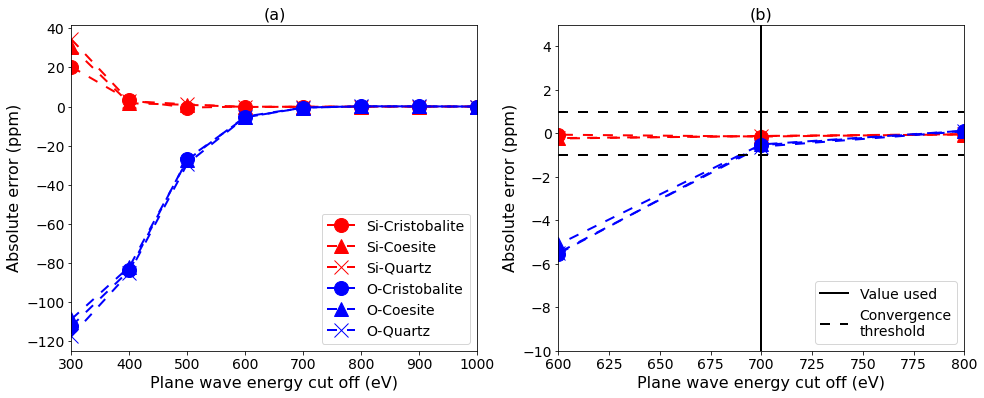

In [4]:
# Convergence with respect to e_cut 
plt.style.use('2figure.mplstyle')
df = pd.read_csv('Convergence/Data/Tabulated/e_cut_con_rates_Si.csv')
df.pop('Unnamed: 0')
df2 = pd.read_csv('Convergence/Data/Tabulated/e_cut_con_rates_O.csv')
df2.pop('Unnamed: 0')

col = df.columns.tolist()
col.remove('e cut')
for i in col:
    df[i[0:2] + '% error'] = (df[i].iloc[-1]-df[i])/df[i].iloc[-1]
for i in col:
    df[i[0:2] + 'ab error'] = df[i].iloc[-1] - df[i]
    
col = df2.columns.tolist()
col.remove('e cut')
for i in col:
    df2[i[0:2] + '% error'] = (df2[i].iloc[-1]-df2[i])/df2[i].iloc[-1]
for i in col:
    df2[i[0:2] + 'ab error'] = df2[i].iloc[-1] - df2[i]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['e cut'], df['3 ab error'], label= 'Si-Cristobalite',
         color= Si_c, marker=Crist_m, linestyle=lin)
ax1.plot(df['e cut'], df['4 ab error'], label= 'Si-Coesite',
         color= Si_c, marker=Coe_m, linestyle=lin)
ax1.plot(df['e cut'], df['10ab error'], label= 'Si-Quartz',
         color= Si_c, marker=Qu_m, linestyle=lin)

ax1.plot(df2['e cut'], df2['3 ab error'], label= 'O-Cristobalite',
         color= O_c, marker=Crist_m, linestyle=lin)
ax1.plot(df2['e cut'], df2['4 ab error'], label= 'O-Coesite',
         color= O_c, marker=Coe_m, linestyle=lin)
ax1.plot(df2['e cut'], df2['10ab error'], label= 'O-Quartz',
         color= O_c, marker=Qu_m, linestyle=lin)
ax1.legend(loc=4,prop={'size': 14})
ax1.set_xlabel('Plane wave energy cut off (eV)')
ax1.set_ylabel('Absolute error (ppm)')
#ax1.plot([300,1000],[0,0],color='black')
ax1.set_xlim(300,1000)
ax1.set_title('(a)')


ax2.plot(df['e cut'], df['3 ab error'],
         color= Si_c, marker=Crist_m, linestyle=lin)
ax2.plot(df['e cut'], df['4 ab error'],
         color= Si_c, marker=Coe_m, linestyle=lin)
ax2.plot(df['e cut'], df['10ab error'],
         color= Si_c, marker=Qu_m, linestyle=lin)

ax2.plot(df2['e cut'], df2['3 ab error'],
         color= O_c, marker=Crist_m, linestyle=lin)
ax2.plot(df2['e cut'], df2['4 ab error'],
         color= O_c, marker=Coe_m, linestyle=lin)
ax2.plot(df2['e cut'], df2['10ab error'],
         color= O_c, marker=Qu_m, linestyle=lin)

ax2.plot([700,700],[-10,10], color='black', label='Value used')
ax2.set_ylim(-10,5)


xmin = 600
xmax = 800
ax2.plot([xmin,xmax],[-1,-1], 'black', linestyle=lin, label='Convergence\nthreshold')
ax2.plot([xmin,xmax],[1,1], 'black', linestyle=lin)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(-10,5)
ax2.set_xlabel('Plane wave energy cut off (eV)')
ax2.set_ylabel('Absolute error (ppm)')
# ax2.arrow(700,-6,0,3,
#           width=5,
#           head_width=10,
#           head_length=0.75,
#           color='black')
ax2.set_title('(b)')
ax2.legend(loc=4, prop={'size': 14})
          

fig.savefig('Plots/E_cut_convergence_plot.png')


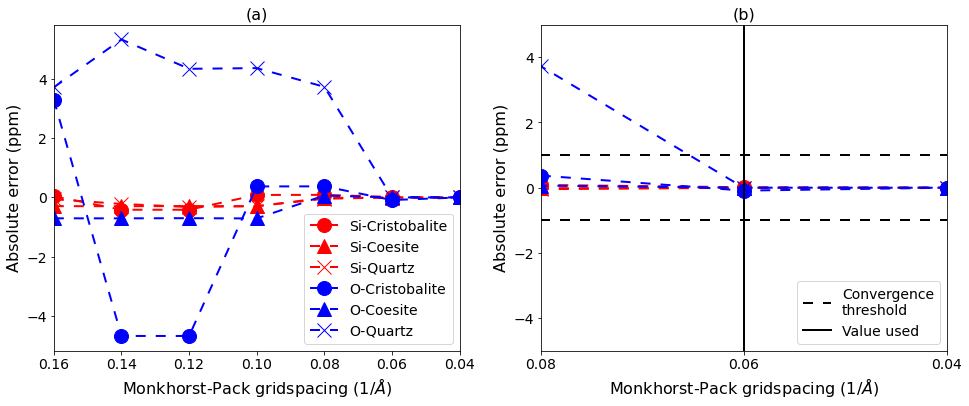

In [5]:
# Convergence with respect to k_space
plt.style.use('2figure.mplstyle')
df = pd.read_csv('Convergence/Data/Tabulated/k_space_con_rates_Si.csv')
df.pop('Unnamed: 0')
df2 = pd.read_csv('Convergence/Data/Tabulated/k_space_con_rates_O.csv')
df2.pop('Unnamed: 0')

col = df.columns.tolist()
col.remove('k space')
for i in col:
    df[i[0:2] + '% error'] = (df[i].iloc[-1]-df[i])/df[i].iloc[-1]
for i in col:
    df[i[0:2] + 'ab error'] = df[i].iloc[-1] - df[i]
    
col = df2.columns.tolist()
col.remove('k space')
for i in col:
    df2[i[0:2] + '% error'] = (df2[i].iloc[-1]-df2[i])/df2[i].iloc[-1]
for i in col:
    df2[i[0:2] + 'ab error'] = df2[i].iloc[-1] - df2[i]
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6) )

ax1.plot(df['k space'], df['3 ab error'], label= 'Si-Cristobalite',
         color= Si_c, marker=Crist_m, linestyle=lin)
ax1.plot(df['k space'], df['4 ab error'], label= 'Si-Coesite',
         color= Si_c, marker=Coe_m, linestyle=lin)
ax1.plot(df['k space'], df['10ab error'], label= 'Si-Quartz',
         color= Si_c, marker=Qu_m, linestyle=lin)

ax1.plot(df2['k space'], df2['3 ab error'], label= 'O-Cristobalite',
         color= O_c, marker=Crist_m, linestyle=lin)
ax1.plot(df2['k space'], df2['4 ab error'], label= 'O-Coesite',
         color= O_c, marker=Coe_m, linestyle=lin)
ax1.plot(df2['k space'], df2['10ab error'], label= 'O-Quartz',
         color= O_c, marker=Qu_m, linestyle=lin)
ax1.set_xlim(0.16,0.04)
ax1.legend(loc=4, prop={'size': 14})
# ax1.plot([0,1],[0,0],color='black')
ax1.set_xlabel('Monkhorst-Pack gridspacing (1/$\AA$)')
ax1.set_ylabel('Absolute error (ppm)')
ax1.set_title('(a)')


ax2.plot(df['k space'], df['3 ab error'],
         color= Si_c, marker=Crist_m, linestyle=lin)
ax2.plot(df['k space'], df['4 ab error'],
         color= Si_c, marker=Coe_m, linestyle=lin)
ax2.plot(df['k space'], df['10ab error'],
         color= Si_c, marker=Qu_m, linestyle=lin)

ax2.plot(df2['k space'], df2['3 ab error'],
         color= O_c, marker=Crist_m, linestyle=lin)
ax2.plot(df2['k space'], df2['4 ab error'],
         color= O_c, marker=Coe_m, linestyle=lin)
ax2.plot(df2['k space'], df2['10ab error'],
         color= O_c, marker=Qu_m, linestyle=lin)
ax2.set_xlim(0.08,0.04)
ax2.plot([0,1],[1,1], color='black', linestyle=lin, label='Convergence\nthreshold')
ax2.plot([0,1],[-1,-1], color='black', linestyle=lin)

ax2.plot([0.06,0.06],[-10,10], color='black', label='Value used')
ax2.set_ylim(-5,5)
ax2.legend(loc=4, prop={'size': 14})

# ax2.arrow(0.06,-4,0,2,           
#           shape='full',
#           width=0.001,
#           head_width=0.002,
#           head_length=0.5,
#           color='black')
ax2.set_xlabel('Monkhorst-Pack gridspacing (1/$\AA$)')
ax2.set_ylabel('Absolute error (ppm)')
ax2.set_xticks([0.08,0.06,0.04,])
ax2.set_title('(b)')

fig.savefig('Plots/k_space_convergence_plot.png')

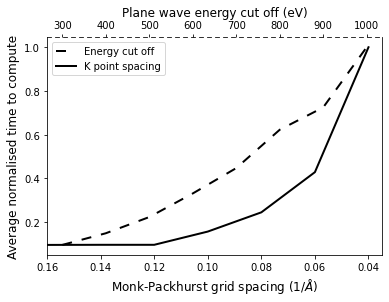

In [20]:
#Computational time wrt DFT parameters
plt.style.use('1figure.mplstyle')
df = pd.read_csv('Convergence/Data/Tabulated/e_cut_con_rates_O_with_comptime.csv')
df.pop('Unnamed: 0')

df2 = pd.read_csv('Convergence/Data/Tabulated/e_cut_con_rates_Si_with_comptime.csv')
df2.pop('Unnamed: 0')

df3 = pd.read_csv('Convergence/Data/Tabulated/k_space_con_rates_O_with_comptime.csv')
df3.pop('Unnamed: 0')

df4 = pd.read_csv('Convergence/Data/Tabulated/k_space_con_rates_Si_with_comptime.csv')
df4.pop('Unnamed: 0')

masE = pd.DataFrame()
masK = pd.DataFrame()
for i in [3,4,7]:
    masE[str(i)+'O'] = df[str(i) + ' - O comp time']/df[str(i)+' - O comp time'].iloc[-1]
    masE[str(i)+'Si'] = df2[str(i) + ' - Si comp time']/df2[str(i)+' - Si comp time'].iloc[-1]
    masK[str(i)+'O'] = df3[str(i) + ' - O comp time']/df3[str(i)+' - O comp time'].iloc[-1]
    masK[str(i)+'Si'] = df4[str(i) + ' - Si comp time']/df4[str(i)+' - Si comp time'].iloc[-1]

masE['Average'] = (masE['3O']+masE['4O']+masE['7O']+masE['3Si']+masE['4Si']+masE['7Si'])/6
masK['Average'] = (masK['3O']+masK['4O']+masK['7O']+masK['3Si']+masK['4Si']+masK['7Si'])/6    
    
fig = plt.figure()
ax1 = fig.add_subplot(111,label='a')
ax1.plot(df['e cut'], masE['Average'], label='Energy cut off',color='black',linestyle=lin)
ax1.plot([],[],label='K point spacing',color='black')
ax1.set_xlabel('Plane wave energy cut off (eV)')
ax1.set_ylabel('Average normalised time to compute')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.spines['top'].set_linestyle(lin)
ax1.legend(prop={'size': 10})


ax2 = fig.add_subplot(111, label='b',frame_on=False)
ax2.set_yticks([])
ax2.plot(df3['k space'], masK['Average'], label='K point spacing',
         color='black')
ax2.set_xlim(0.16,0.035)
ax2.set_xlabel('Monk-Packhurst grid spacing (1/$\AA$)')


fig.savefig('Plots/comp_time_and_dft_params.png')


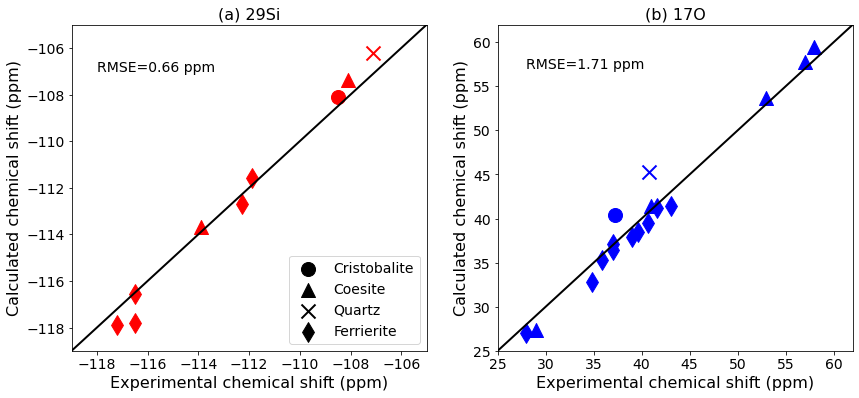

In [7]:
#Comparing to experiment
plt.style.use('2figure.mplstyle')
si = pd.read_csv('Polymorphs/comp_exp_Si.csv')
si_o = pd.read_csv('Polymorphs/comp_exp_Si_opt.csv')
o = pd.read_csv('Polymorphs/comp_exp_O.csv')
o_o = pd.read_csv('Polymorphs/comp_exp_O_opt.csv')

si_rmse = round(mean_squared_error(si['experiment shift'],si['theory shift'],
                            squared=False),2)
o_rmse = round(mean_squared_error(o['experiment shift'],o['theory shift'],
                            squared=False),2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(si['experiment shift'][0:1], si['theory shift'][0:1],
            color=Si_c, marker = Crist_m)
ax1.scatter(si['experiment shift'][1:3], si['theory shift'][1:3],
            color=Si_c, marker=Coe_m)
ax1.scatter(si['experiment shift'][3:4], si['theory shift'][3:4],
            color=Si_c, marker=Qu_m)
ax1.scatter(si['experiment shift'][4:9], si['theory shift'][4:9],
            color=Si_c, marker=Fer_m)

ax1.scatter([], [],
            label='Cristobalite',color='black', marker = Crist_m)
ax1.scatter([], [],
            label='Coesite', color='black', marker=Coe_m)
ax1.scatter([], [],
            label='Quartz', color='black', marker=Qu_m)
ax1.scatter([], [],
            label='Ferrierite',color='black', marker=Fer_m)


ax1.plot([-130,-100],[-130,-100],color='black')
ax1.set_xlim(-119,-105)
ax1.set_ylim(-119,-105)
ax1.set_title('(a) 29Si')
ax1.legend(loc=4, prop={'size': 14})
ax1.annotate('RMSE='+str(si_rmse)+' ppm', xy=(-118,-107)).set_fontsize(14)
ax1.set_xlabel('Experimental chemical shift (ppm)')
ax1.set_ylabel('Calculated chemical shift (ppm)')

ax2.scatter(o['experiment shift'][0:1], o['theory shift'][0:1],
            label='Cristobalite', color=O_c, marker=Crist_m)
ax2.scatter(o['experiment shift'][1:6], o['theory shift'][1:6],
            label='Coesite', color=O_c, marker=Coe_m)
ax2.scatter(o['experiment shift'][6:7], o['theory shift'][6:7],
            label='Quartz', color=O_c, marker=Qu_m)
ax2.scatter(o['experiment shift'][7:], o['theory shift'][7:],
            label='Ferrierite',color=O_c, marker=Fer_m)
ax2.plot([0,100],[0,100],color='black')
ax2.set_xlim(25,62)
ax2.set_ylim(25,62)
ax2.set_title('(b) 17O')
ax2.annotate('RMSE='+str(o_rmse) +' ppm', xy=(28,57)).set_fontsize(14)
ax2.set_xlabel('Experimental chemical shift (ppm)')
ax2.set_ylabel('Calculated chemical shift (ppm)')

fig.savefig('Plots/Compare_to_exp.png')


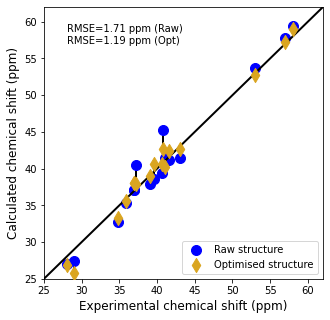

In [8]:
#Effect of geom_optimised

plt.style.use('1figure.mplstyle')
o = pd.read_csv('Polymorphs/comp_exp_O.csv')
o_o = pd.read_csv('Polymorphs/comp_exp_O_opt.csv')

o_rmse = round(mean_squared_error(o['experiment shift'],o['theory shift'],
                            squared=False),2)
o_o_rmse = round(mean_squared_error(o_o['experiment shift'],o_o['theory shift'],
                            squared=False),2)

exp = list(o['experiment shift'])
th = list(o['theory shift'])
th_o = list(o_o['theory shift'])
plt.figure(figsize=(5,5))
for i in exp:
    ind = exp.index(i)
    plt.plot([exp[ind],exp[ind]],[th[ind],th_o[ind]],marker='',color='black', zorder=1)
    plt.scatter(exp[ind],th[ind],marker='o',color=O_c,zorder=2)
    plt.scatter(exp[ind],th_o[ind],marker='d',color=c_3, zorder=3)
plt.scatter([],[],marker='o',color=O_c,label='Raw structure')
plt.scatter([],[],marker='d',color=c_3,label='Optimised structure')
plt.plot([0,80],[0,80],color='black')
plt.xlim(25,62)
plt.ylim(25,62)
plt.legend(loc=4,prop={'size': 10})
plt.xlabel('Experimental chemical shift (ppm)')
plt.ylabel('Calculated chemical shift (ppm)')


plt.annotate('RMSE='+str(o_rmse)+' ppm'+ ' (Raw)\nRMSE='+str(o_o_rmse)+' ppm' + ' (Opt)',
             xy=(28,57))

plt.savefig('Plots/Geom_opt_example.png')


#o.head()

    #Results section two
    

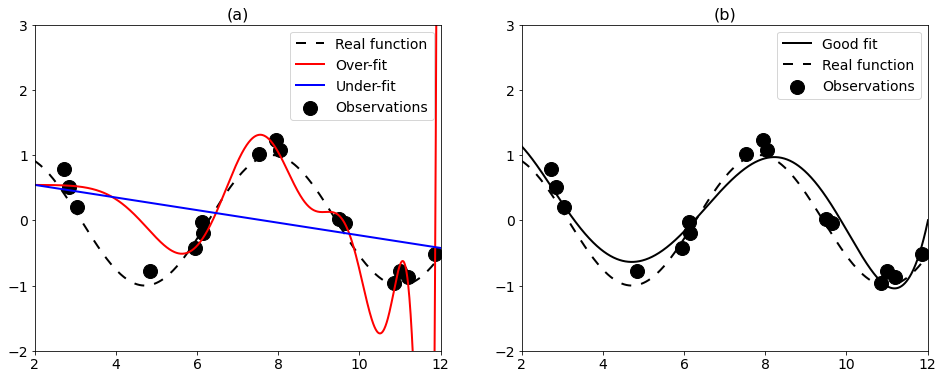

In [139]:
#Overfitting plot
import random
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.style.use('2figure.mplstyle')

x = np.random.choice(np.arange(0.1,13,0.1), 20).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)

for i in range(0,len(y)):
    y[i] = y[i] + np.random.rand() * 0.25
for i in range(0,len(x)):
    x[i] = x[i] + np.random.rand() * 0.25

x_l = np.arange(0.01,13,0.01).reshape(-1, 1)
y_l = np.sin(x_l)



poly_f = PolynomialFeatures(degree = 20, include_bias=False)
lin_reg = LinearRegression()
pipe = Pipeline([("polynomial_features",poly_f),('linear_regression', lin_reg)])
pipe.fit(x,y)

y_pr20 = pipe.predict(x_l)

poly_f = PolynomialFeatures(degree = 6, include_bias=False)
lin_reg = LinearRegression()
pipe = Pipeline([("polynomial_features",poly_f),('linear_regression', lin_reg)])
pipe.fit(x,y)

y_pr5 = pipe.predict(x_l)

poly_f = PolynomialFeatures(degree = 1, include_bias=False)
lin_reg = LinearRegression()
pipe = Pipeline([("polynomial_features",poly_f),('linear_regression', lin_reg)])
pipe.fit(x,y)

y_pr1 = pipe.predict(x_l)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.scatter(x, y, label ='Observations', color='black')
ax1.plot(x_l,y_l,label='Real function', color='black', linestyle=lin)
ax1.plot(x_l,y_pr20, label='Over-fit', color=Si_c)
ax1.plot(x_l,y_pr1,label='Under-fit', color=O_c)
ax1.set_xlim(2,12)
ax1.set_ylim(-2,3)
ax1.legend(loc=1, prop={'size': 14})
ax1.set_title('(a)')

ax2.plot(x_l,y_pr5,label='Good fit', color='black')
ax2.scatter(x, y, label ='Observations', color='black')
ax2.plot(x_l,y_l,label='Real function', color='black', linestyle=lin)
ax2.set_xlim(2,12)
ax2.set_ylim(-2,3)
ax2.legend(loc=1, prop={'size': 14})
ax2.set_title('(b)')

plt.savefig('Plots/regularlisation2.png')


In [ ]:
#effect of training data size?

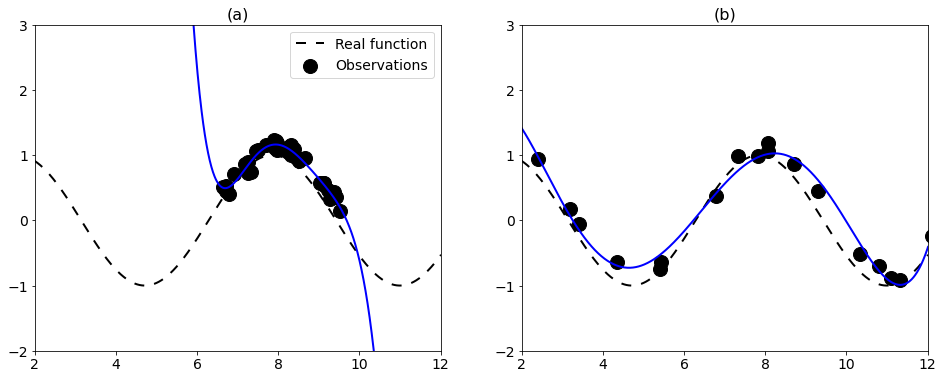

In [40]:
#Effect of data distribution

#Overfitting plot
import random
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.style.use('2figure.mplstyle')

x = np.random.choice(np.arange(6.5,9.5,0.1), 40).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)

for i in range(0,len(y)):
    y[i] = y[i] + np.random.rand() * 0.25
for i in range(0,len(x)):
    x[i] = x[i] + np.random.rand() * 0.25

x_l = np.arange(0.01,13,0.01).reshape(-1, 1)
y_l = np.sin(x_l)

poly_f = PolynomialFeatures(degree = 5, include_bias=False)
lin_reg = LinearRegression()
pipe = Pipeline([("polynomial_features",poly_f),('linear_regression', lin_reg)])
pipe.fit(x,y)

y_pr_sp = pipe.predict(x_l)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.scatter(x,y,color='black',label='Observations')
ax1.plot(x_l,y_l,color='black',label='Real function',linestyle=lin)
ax1.plot(x_l,y_pr_sp, color=O_c)
ax1.set_xlim(2,12)
ax1.set_ylim(-2,3)
ax1.set_title('(a)')
ax1.legend(loc=1, prop={'size': 14})


x = np.random.choice(np.arange(0,13,0.1), 20).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)

for i in range(0,len(y)):
    y[i] = y[i] + np.random.rand() * 0.25
for i in range(0,len(x)):
    x[i] = x[i] + np.random.rand() * 0.25

x_l = np.arange(0.01,13,0.01).reshape(-1, 1)
y_l = np.sin(x_l)

poly_f = PolynomialFeatures(degree = 5, include_bias=False)
lin_reg = LinearRegression()
pipe = Pipeline([("polynomial_features",poly_f),('linear_regression', lin_reg)])
pipe.fit(x,y)

y_pr_sp = pipe.predict(x_l)

ax2.scatter(x,y,color='black',label='Observations')
ax2.plot(x_l,y_l,color='black',label='Real function',linestyle=lin)
ax2.plot(x_l,y_pr_sp, color=O_c)
ax2.set_xlim(2,12)
ax2.set_ylim(-2,3)
ax2.set_title('(b)')

plt.savefig('Plots/Data_dist_effect.png')

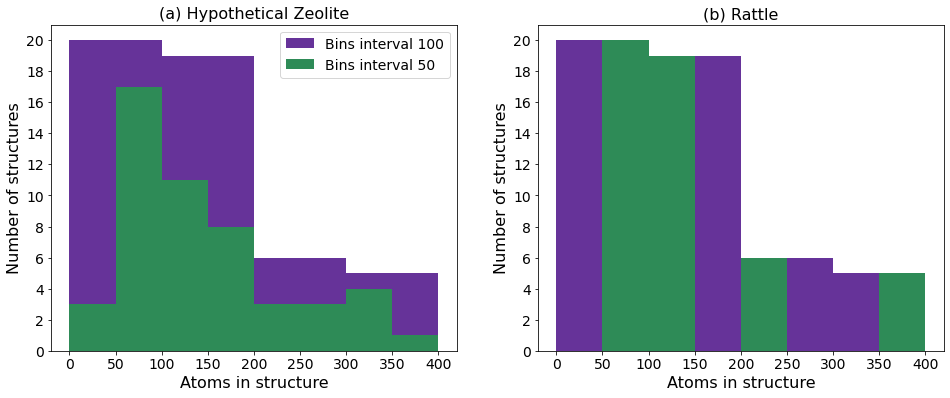

In [7]:
#Size distribution
plt.style.use('2figure.mplstyle')
hz_sizes = []
rat_sizes = []

for i in glob.glob('ML2/Data/HypoZeo/*.magres'):
    hz_sizes.append(len(ase.io.read(i)))

for i in glob.glob('ML2/Data/Rattle/*.magres'):
    rat_sizes.append(len(ase.io.read(i)))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.hist(hz_sizes, bins=range(0,401,100), color=c_1, label='Bins interval 100')
ax1.hist(hz_sizes, bins=range(0,401,50), color=c_2, label='Bins interval 50')
ax1.legend(loc=1, prop={'size': 14})
ax1.set_title('(a) Hypothetical Zeolite')
ax1.set_yticks(range(0,21,2))
ax1.set_ylabel('Number of structures')
ax1.set_xlabel('Atoms in structure')


ax2.hist(rat_sizes, bins=range(0,401,100), color=c_1, label='Bins interval 100')
ax2.hist(rat_sizes, bins=range(0,401,50), color=c_2, label='Bins interval 50')
ax2.set_title('(b) Rattle')
ax2.set_yticks(range(0,21,2))
ax2.set_ylabel('Number of structures')
ax2.set_xlabel('Atoms in structure')

fig.savefig('Plots/Structure_dist.png')

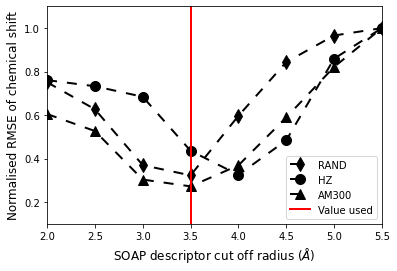

In [3]:
#GPR r_cut selection
plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/r_cut_opt.csv')

cat = ['Rattle','AM300K','HypoZeo']

for i in cat:
    df[i+'rmse_norm'] = df[i+'rmse'] / df[i+'rmse'][7]

plt.plot(df['cuts'],df['Rattlermse_norm'], color='black', linestyle=lin,
         label='RAND', marker = Fer_m)
plt.plot(df['cuts'],df['HypoZeormse_norm'], color='black', linestyle=lin,
         label='HZ', marker = Crist_m)
plt.plot(df['cuts'],df['AM300Krmse_norm'], color='black', linestyle=lin,
         label ='AM300', marker = Coe_m)
plt.xlim(2,5.5)
plt.ylim(0.1,1.1)
plt.xlabel('SOAP descriptor cut off radius ($\AA$)')
plt.ylabel('Normalised RMSE of chemical shift')
plt.plot([3.5,3.5],[0,1.1],color=Si_c,label='Value used')
plt.legend(loc=4,prop={'size': 10})


plt.savefig('Plots/GPR_r_cut_opt.png')


In [86]:
df.head(10)

,Unnamed: 0,gauss width,Rattle,HypoZeo,AM300K
0,0,0.1,0.532690,2.604425,3.638228
1,1,0.2,0.497299,2.548190,5.486394
2,2,0.3,0.504802,2.806459,4.238998
3,3,0.4,0.520759,2.860262,3.524232
4,4,0.5,0.565975,2.966926,3.020629
5,5,0.6,0.659815,3.085578,3.297688
6,6,0.7,0.789261,3.107294,3.296270
7,7,0.8,0.964525,3.085729,2.369547
8,8,0.9,1.226625,3.237399,3.122473


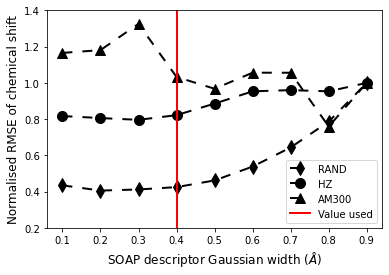

In [4]:
#GPR Gauss width

plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/Gauss_width_opt.csv')

cat = ['Rattle','AM300K','HypoZeo']

for i in cat:
    df[i+'rmse_norm'] = df[i] / df[i][8]

plt.plot(df['gauss width'],df['Rattlermse_norm'], color='black', linestyle=lin,
         label='RAND', marker = Fer_m)
plt.plot(df['gauss width'],df['HypoZeormse_norm'], color='black', linestyle=lin,
         label='HZ', marker = Crist_m)
plt.plot(df['gauss width'],df['AM300Krmse_norm'], color='black', linestyle=lin,
         label ='AM300', marker = Coe_m)

plt.xlabel('SOAP descriptor Gaussian width ($\AA$)')
plt.ylabel('Normalised RMSE of chemical shift')
plt.ylim(0.2,1.4)
plt.plot([0.4,0.4],[0,2],color=Si_c,label='Value used')
plt.legend(loc = 4,prop={'size': 10})

plt.savefig('Plots/GPR_gauss_width_opt.png')

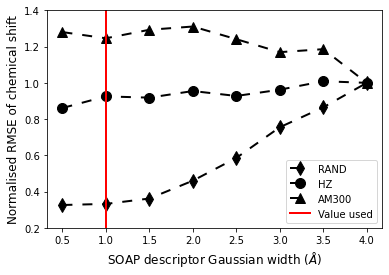

In [5]:
#GPR Gaussian width opt

plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/smo_opt.csv')

cat = ['Rattle','AM300K','HypoZeo']

for i in cat:
    df[i+'rmse_norm'] = df[i+'rmse'] / df[i+'rmse'][7]

plt.plot(df['cuts'],df['Rattlermse_norm'], color='black', linestyle=lin,
         label='RAND', marker = Fer_m)
plt.plot(df['cuts'],df['HypoZeormse_norm'], color='black', linestyle=lin,
         label='HZ', marker = Crist_m)
plt.plot(df['cuts'],df['AM300Krmse_norm'], color='black', linestyle=lin,
         label ='AM300', marker = Coe_m)

plt.xlabel('SOAP descriptor Gaussian width ($\AA$)')
plt.ylabel('Normalised RMSE of chemical shift')
plt.ylim(0.2,1.4)
plt.plot([1,1],[0,2],color=Si_c,label='Value used')
plt.legend(loc = 4,prop={'size': 10})

plt.savefig('Plots/GPR_smo_opt.png')

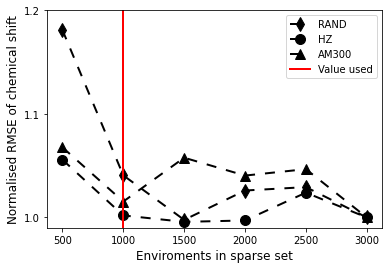

In [6]:
#GPR sparse size

plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/sp_size_opt.csv')

cat = ['Rattle','AM300K','HypoZeo']

for i in cat:
    df[i+'rmse_norm'] = df[i+'rmse'] / df[i+'rmse'][5]

plt.plot(df['cuts'],df['Rattlermse_norm'], color='black', linestyle=lin,
         label='RAND', marker = Fer_m)
plt.plot(df['cuts'],df['HypoZeormse_norm'], color='black', linestyle=lin,
         label='HZ', marker = Crist_m)
plt.plot(df['cuts'],df['AM300Krmse_norm'], color='black', linestyle=lin,
         label ='AM300', marker = Coe_m)
plt.ylim(0.99,1.2)
plt.plot([1000,1000],[0.6,2],color=Si_c,label='Value used')
plt.xlabel('Enviroments in sparse set')
plt.ylabel('Normalised RMSE of chemical shift')
plt.legend(prop={'size': 10})
plt.yticks([1.0,1.1,1.2])

plt.savefig('Plots/GPR_sp_size_opt.png')

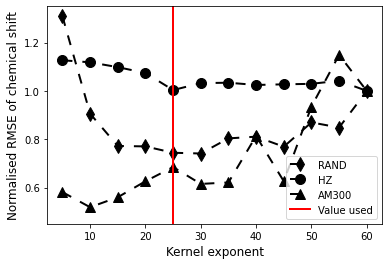

In [7]:
#GPR ker_exp

plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/ker_exp_opt.csv')

cat = ['Rattle','AM300K','HypoZeo']

for i in cat:
    df[i+'_rmse_norm'] = df[i+'_rmse'] / df[i+'_rmse'][11]

plt.plot(df['exps'],df['Rattle_rmse_norm'], color='black', linestyle=lin,
         label='RAND', marker = Fer_m)
plt.plot(df['exps'],df['HypoZeo_rmse_norm'], color='black', linestyle=lin,
         label='HZ', marker = Crist_m)
plt.plot(df['exps'],df['AM300K_rmse_norm'], color='black', linestyle=lin,
         label ='AM300', marker = Coe_m)
plt.ylim(0.45,1.35)
plt.plot([25,25],[0,2],color=Si_c,label='Value used')
plt.xlabel('Kernel exponent')
plt.ylabel('Normalised RMSE of chemical shift')
plt.legend(loc=4,prop={'size': 10})


plt.savefig('Plots/GPR_ker_exp_opt.png')

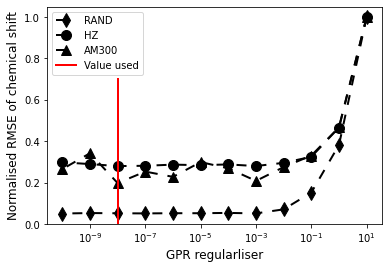

In [8]:
#GPR reg

plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/reg_opt.csv')

cat = ['Rattle','AM300K','HypoZeo']

for i in cat:
    df[i+'rmse_norm'] = df[i+'rmse'] / df[i+'rmse'][0]

plt.plot(df['cuts'],df['Rattlermse_norm'], color='black', linestyle=lin,
         label='RAND', marker = Fer_m)
plt.plot(df['cuts'],df['HypoZeormse_norm'], color='black', linestyle=lin,
         label='HZ', marker = Crist_m)
plt.plot(df['cuts'],df['AM300Krmse_norm'], color='black', linestyle=lin,
         label ='AM300', marker = Coe_m)
plt.ylim(0,1.05)
plt.plot([1*10**-8,1*10**-8],[0,0.7],color=Si_c,label='Value used')
plt.xlabel('GPR regularliser')
plt.ylabel('Normalised RMSE of chemical shift')
plt.legend(prop={'size': 10})
plt.xscale('log')


plt.savefig('Plots/GPR_reg_opt.png')

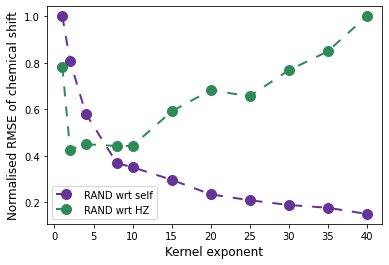

In [9]:
df = pd.read_csv('ML2/ker_exp_default_params.csv')
df2 = pd.read_csv('ML2/ker_exp_default_params_wrt_hz.csv')
df['rmse'] = df['rmse']/df['rmse'].iloc[0]
df2['rmse'] = df2['rmse']/df2['rmse'].iloc[-1]

plt.plot(df['ker exp'], df['rmse'], marker='o',linestyle=lin, color=c_1, label='RAND wrt self')
plt.plot(df2['ker exp'], df2['rmse'], marker='o',linestyle=lin, color=c_2, label='RAND wrt HZ')
plt.legend()
plt.xlabel('Kernel exponent')
plt.ylabel('Normalised RMSE of chemical shift')
plt.savefig('Plots/ker_exp_default_params.png')

In [93]:
#GPR ker_exp with default params
plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/ker_exp_default_params.csv')

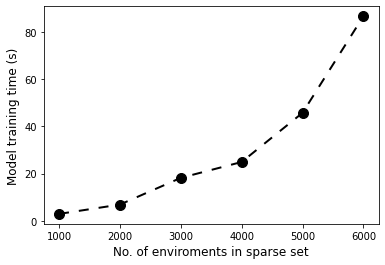

In [4]:
#Effect of sp\_size
plt.style.use('1figure.mplstyle')
df = pd.read_csv('Comp Times/Sparse-size.csv')

plt.plot(df['Sparse size'],df['Train time'], marker='o', linestyle=lin, color='black')
plt.ylabel('Model training time (s)')
plt.xlabel('No. of enviroments in sparse set')
plt.savefig('Plots/train_time_sparse_set.png')

In [ ]:
#Code extract

#Programme for optimisation of GPR hyperparameters from initial set
#Each result is carried on to the next function by finding parameter with minimum RMSE
#Each parameter tried involves a 10 fold cross-validation

#Optimisation of r_cut by testing over range: 2-7Å
opt_cut,x_c, dat_c = cut_off_opt(cat, 2, 7, 0.5, i_smo, i_sp, i_ker, i_reg)
#Optimisation of sp_size by testing over size range: 500-3500 
opt_sp, x_sp, dat_sp = sparse_size_opt(cat, i_cut, 0.5, 500, 3500, 500, 20, 1*10**-8, 0.2)
#Optimisation of ker_exp by testing over range: 5-65
opt_ker, x_k, dat_k = ker_exp_opt(cat, i_cut, 0.5, i_sp, 5, 65, 5, 1*10**-8)
#Optimisation of reg by testing over range: 1e1-1e-9
opt_reg, x_r, dat_r = reg_opt(cat, i_cut, 0.5, i_sp, i_ker, 1, -9, -1)
#Optimisation of Gaussian width by testing over range: 0.1-1Å
opt_smo, x_sm, dat_sm = smooth_opt(cat, i_cut, 0.1, 1.0, 0.1, i_sp, i_ker, i_reg)
#Final validation of model performance with new hyperparameters
runner(cat, opt_cut, opt_smo, opt_sp, opt_ker, opt_reg, 10)

In [ ]:
#Results 3

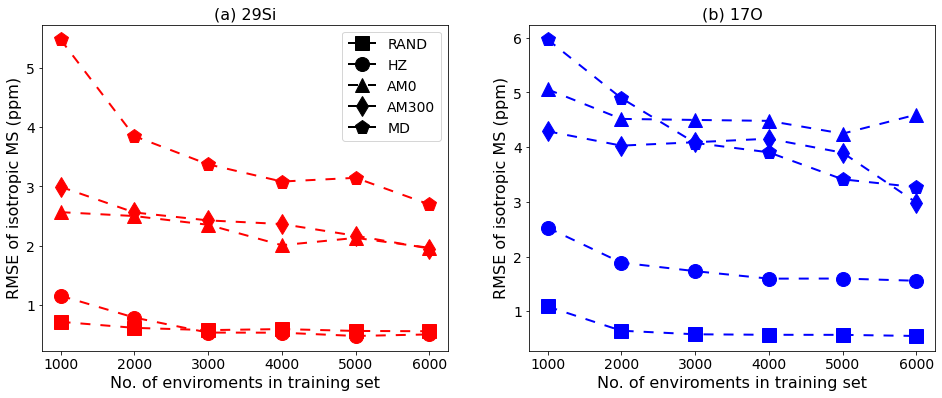

In [9]:
#Learning curves

plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML2/Learning_curves_split_Rattle.csv')
df2 = pd.read_csv('ML2/Learning_curves_split_HypoZeo.csv')
df3 = pd.read_csv('ML2/Learning_curves_split_AM0K.csv')
df4 = pd.read_csv('ML2/Learning_curves_split_AM300K.csv')
df5 = pd.read_csv('ML2/Learning_curves_split_MD_Distorted.csv')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(df['train sizes'], df['si rmse'], linestyle=lin, color=Si_c, marker=Rat_m)
ax1.plot(df['train sizes'], df2['si rmse'], linestyle=lin, color=Si_c, marker=HZ_m)
ax1.plot(df['train sizes'], df3['si rmse'], linestyle=lin, color=Si_c, marker=AM0_m)
ax1.plot(df['train sizes'], df4['si rmse'], linestyle=lin, color=Si_c, marker=AM3_m)
ax1.plot(df['train sizes'], df5['si rmse'], linestyle=lin, color=Si_c, marker=MD_m)

ax1.plot([], [], linestyle=lin, color='black', marker=Rat_m, label='RAND')
ax1.plot([], [], linestyle=lin, color='black', marker=HZ_m, label='HZ')
ax1.plot([], [], linestyle=lin, color='black', marker=AM0_m, label='AM0')
ax1.plot([], [], linestyle=lin, color='black', marker=AM3_m, label='AM300')
ax1.plot([], [], linestyle=lin, color='black', marker=MD_m, label='MD')
ax1.legend(prop={'size': 14})
ax1.set_xlabel('No. of enviroments in training set')
ax1.set_ylabel('RMSE of isotropic MS (ppm)')
ax1.set_title('(a) 29Si')

ax2.plot(df['train sizes'], df['o rmse'], linestyle=lin, color=O_c, marker=Rat_m, label='Rattle')
ax2.plot(df['train sizes'], df2['o rmse'], linestyle=lin, color=O_c, marker=HZ_m, label='HypoZeo')
ax2.plot(df['train sizes'], df3['o rmse'], linestyle=lin, color=O_c, marker=AM0_m, label='Am0K')
ax2.plot(df['train sizes'], df4['o rmse'], linestyle=lin, color=O_c, marker=AM3_m, label='AM3K')
ax2.plot(df['train sizes'], df5['o rmse'], linestyle=lin, color=O_c, marker=MD_m, label='MD')
ax2.set_xlabel('No. of enviroments in training set')
ax2.set_ylabel('RMSE of isotropic MS (ppm)')
ax2.set_title('(b) 17O')

df5.head(10)

fig.savefig('Plots/wrt_self_learning_curve.png')
#n.b have chnaged r_cut from 3.5 to 4 for r_cut to get peformance gain.
#Other slight improvement could be made elsewhere but not as durastic

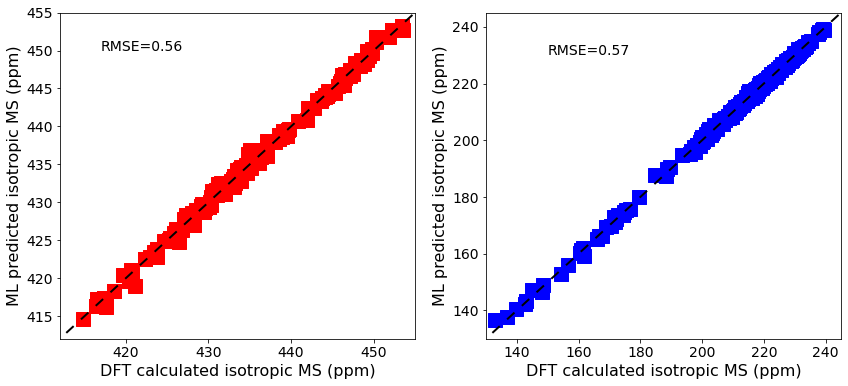

In [29]:
#Single dataset 'Rattle' wrt self
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML2/Rattle_O_wrt_self.csv')
df2 = pd.read_csv('ML2/Rattle_Si_wrt_self.csv')
# o_rmse = round(mean_squared_error(df['O tar'],df['O pred'],squared=False),2)
# si_rmse = round(mean_squared_error(df2['Si tar'],df2['Si pred'],squared=False),2)
o_rmse = 0.57
si_rmse = 0.56


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(df2['Si tar'],df2['Si pred'],color=Si_c,marker=Rat_m)
ax1.set_xlim(412,455)
ax1.set_ylim(412,455)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')

ax1.annotate('RMSE='+str(si_rmse), xy=(417,450)).set_fontsize(14)


ax2.scatter(df['O tar'],df['O pred'],color=O_c,marker=Rat_m)
ax2.set_xlim(130,245)
ax2.set_ylim(130,245)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')

ax2.annotate('RMSE='+str(o_rmse), xy=(150,230)).set_fontsize(14)

fig.savefig('Plots/Rattle_wrt_self.png')

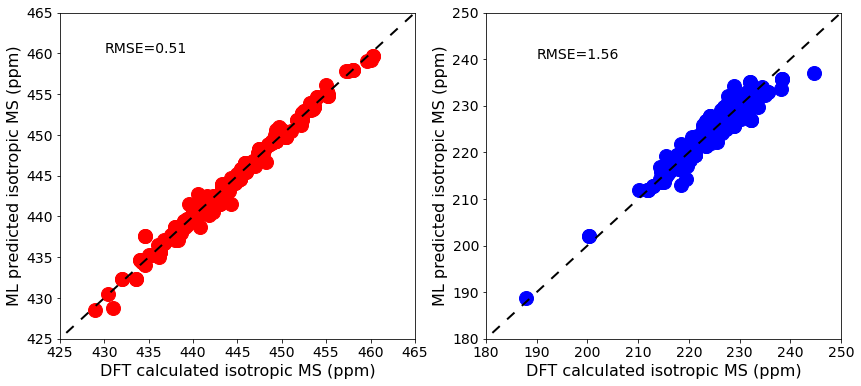

In [30]:
#Single dataset 'HypoZeo' wrt self
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML2/HypoZeo_O_wrt_self.csv')
df2 = pd.read_csv('ML2/HypoZeo_Si_wrt_self.csv')
# o_rmse = round(mean_squared_error(df['O tar'],df['O pred'],squared=False),2)
# si_rmse = round(mean_squared_error(df2['Si tar'],df2['Si pred'],squared=False),2)
o_rmse = 1.56
si_rmse = 0.51


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(df2['Si tar'],df2['Si pred'],color=Si_c,marker=HZ_m)
ax1.set_xlim(425,465)
ax1.set_ylim(425,465)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')

ax1.annotate('RMSE='+str(si_rmse), xy=(430,460)).set_fontsize(14)


ax2.scatter(df['O tar'],df['O pred'],color=O_c,marker=HZ_m)
ax2.set_xlim(180,250)
ax2.set_ylim(180,250)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')

ax2.annotate('RMSE='+str(o_rmse), xy=(190,240)).set_fontsize(14)

fig.savefig('Plots/HypoZeo_wrt_self.png')

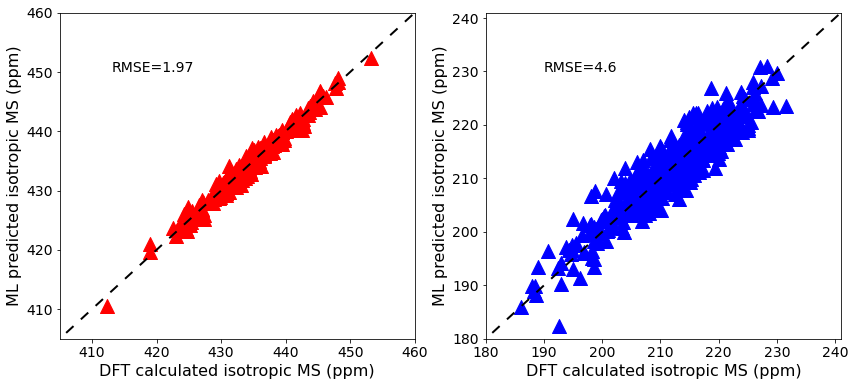

In [31]:
#Single dataset 'Am0K' wrt self
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML2/AM0K_O_wrt_self.csv')
df2 = pd.read_csv('ML2/AM0K_Si_wrt_self.csv')
# o_rmse = round(mean_squared_error(df['O tar'],df['O pred'],squared=False),2)
# si_rmse = round(mean_squared_error(df2['Si tar'],df2['Si pred'],squared=False),2)
o_rmse = 4.60
si_rmse = 1.97


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(df2['Si tar'],df2['Si pred'],color=Si_c,marker=AM0_m)
ax1.set_xlim(405,460)
ax1.set_ylim(405,460)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')

ax1.annotate('RMSE='+str(si_rmse), xy=(413,450)).set_fontsize(14)


ax2.scatter(df['O tar'],df['O pred'],color=O_c,marker=AM0_m)
ax2.set_xlim(180,241)
ax2.set_ylim(180,241)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')

ax2.annotate('RMSE='+str(o_rmse), xy=(190,230)).set_fontsize(14)

fig.savefig('Plots/AM0K_wrt_self.png')

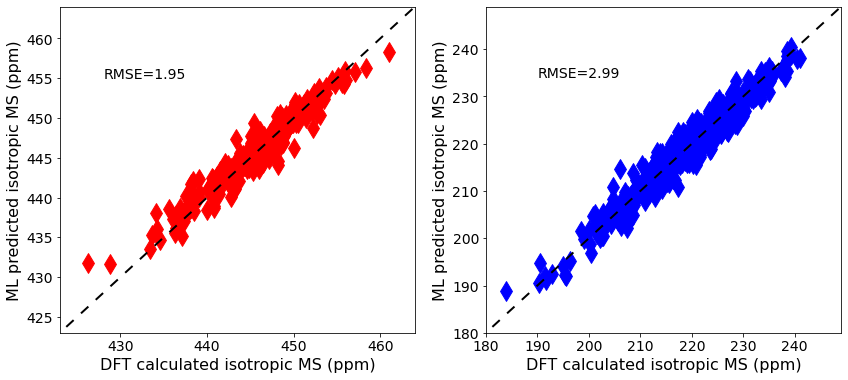

In [32]:
#Single dataset 'Am3K' wrt self
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML2/AM3K_O_wrt_self.csv')
df2 = pd.read_csv('ML2/AM3K_Si_wrt_self.csv')
# o_rmse = round(mean_squared_error(df['O tar'],df['O pred'],squared=False),2)
# si_rmse = round(mean_squared_error(df2['Si tar'],df2['Si pred'],squared=False),2)
o_rmse = 2.99
si_rmse = 1.95


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(df2['Si tar'],df2['Si pred'],color=Si_c,marker=AM3_m)
ax1.set_xlim(423,464)
ax1.set_ylim(423,464)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')

ax1.annotate('RMSE='+str(si_rmse), xy=(428,455)).set_fontsize(14)


ax2.scatter(df['O tar'],df['O pred'],color=O_c,marker=AM3_m)
ax2.set_xlim(180,249)
ax2.set_ylim(180,249)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')

ax2.annotate('RMSE='+str(o_rmse), xy=(190,234)).set_fontsize(14)

fig.savefig('Plots/AM300K_wrt_self.png')

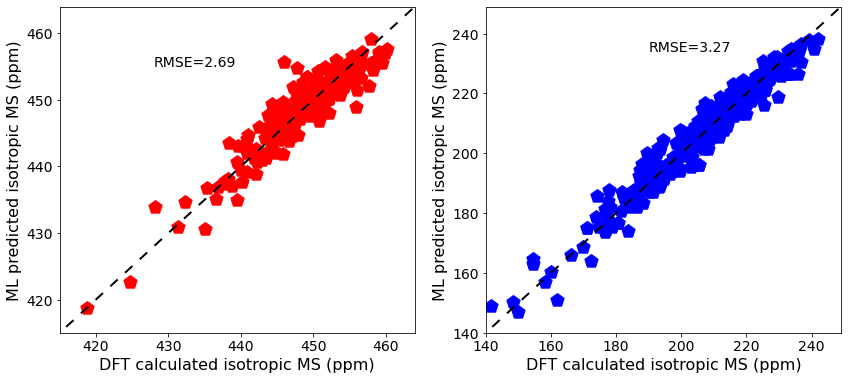

In [33]:
#Single dataset 'MD' wrt self
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML2/MD_O_wrt_self.csv')
df2 = pd.read_csv('ML2/MD_Si_wrt_self.csv')
# o_rmse = round(mean_squared_error(df['O tar'],df['O pred'],squared=False),2)
# si_rmse = round(mean_squared_error(df2['Si tar'],df2['Si pred'],squared=False),2)
o_rmse = 3.27
si_rmse = 2.69


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(df2['Si tar'],df2['Si pred'],color=Si_c,marker=MD_m)
ax1.set_xlim(415,464)
ax1.set_ylim(415,464)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')

ax1.annotate('RMSE='+str(si_rmse), xy=(428,455)).set_fontsize(14)


ax2.scatter(df['O tar'],df['O pred'],color=O_c,marker=MD_m)
ax2.set_xlim(140,249)
ax2.set_ylim(140,249)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')

ax2.annotate('RMSE='+str(o_rmse), xy=(190,234)).set_fontsize(14)

fig.savefig('Plots/MD_wrt_self.png')

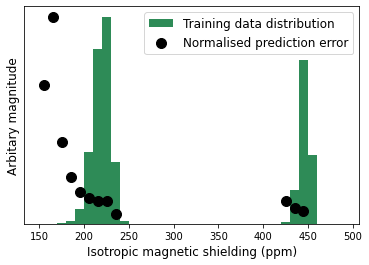

In [10]:
#Error distribution error-real dat dist
plt.style.use('1figure.mplstyle')
df = pd.read_csv('ML2/error_data_dist_Hist.csv')
df2 = pd.read_csv('ML2/error_data_dist_ERRORS.csv')


# def species_splitter(target):
#     ids_o = []
#     ids_si = []

#     for i in enumerate(target):
#         if i[1] < 350:
#             ids_o.append(i[0])
#         else:
#             ids_si.append(i[0])
            
#     o_tar = target[ids_o]

    
#     si_tar = target[ids_si]

    
#     return o_tar, si_tar
# o_tar, si_tar = species_splitter(df['Real MS (train)'])

bins = range(150,500,10)

# weights = np.ones_like(o_tar)/len(df['Real MS (train)'])
# plt.hist(o_tar, weights=weights,bins=bins,color=O_c)

# weights = np.ones_like(si_tar)/len(df['Real MS (train)'])
# plt.hist(si_tar, weights=weights,bins=bins, color=Si_c)

#If switch can show O , SI seperate or atleat coloured differently


weights = np.ones_like(df['Real MS (train)'])/len(df['Real MS (train)'])
plt.hist(df['Real MS (train)'], weights=weights,bins=bins, label='Training data distribution', color=c_2)


plt.scatter(df2['real MS (pred)'],df2['normed error'],color='black',zorder=10, label='Normalised prediction error')
plt.yticks([])
plt.legend(prop={'size': 12})
plt.xlabel('Isotropic magnetic shielding (ppm)')
plt.ylabel('Arbitary magnitude')


plt.savefig('Plots/error_dist_true_val_dist.png')

Text(0.5, 1.0, '(b) AM300K')

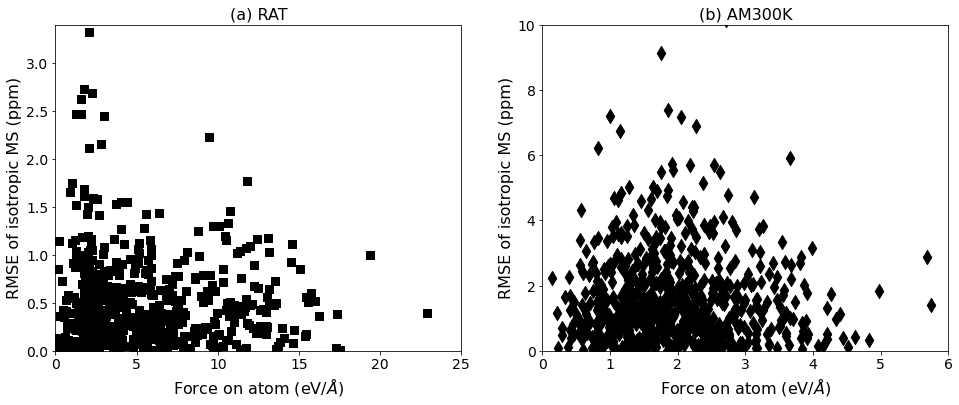

In [48]:
#Error distribution, force,error
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML2/Rattle_force_error.csv')
df2 = pd.read_csv('ML2/AM300K_force_error.csv')



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.scatter(df['force'], df['error'], color='black', marker=Rat_m, s =50)
ax1.set_xlim(0,25)
ax1.set_ylim(0, 3.4)
ax1.set_xlabel('Force on atom (eV/$\AA$)')
ax1.set_ylabel('RMSE of isotropic MS (ppm)')
ax1.set_title('(a) RAT')



ax2.scatter(df2['force'], df2['error'], color='black', marker=AM3_m, s=100)
ax2.set_xlim(0,6)
ax2.set_ylim(0, 10)
ax2.set_xlabel('Force on atom (eV/$\AA$)')
ax2.set_ylabel('RMSE of isotropic MS (ppm)')
ax2.set_title('(b) AM300K')

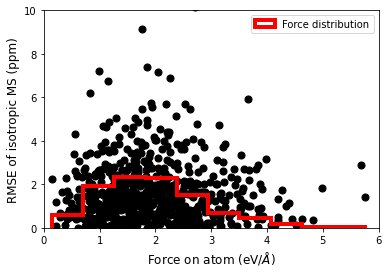

In [25]:
#force error, just on aM300K
plt.style.use('1figure.mplstyle')
df = pd.read_csv('ML2/AM300K_force_error.csv')

plt.scatter(df['force'], df['error'], color='black', s=50)
plt.xlim(0,6)
plt.ylim(0,10)
plt.xlabel('Force on atom (eV/$\AA$)')
plt.ylabel('RMSE of isotropic MS (ppm)')
weights = np.ones_like(df['force'])/len(df['force'])*10
plt.hist(df['force'], weights=weights, edgecolor = Si_c, histtype='step',
         linewidth=4, label = 'Force distribution')
plt.legend()

plt.savefig('Plots/force_error_hist.png')

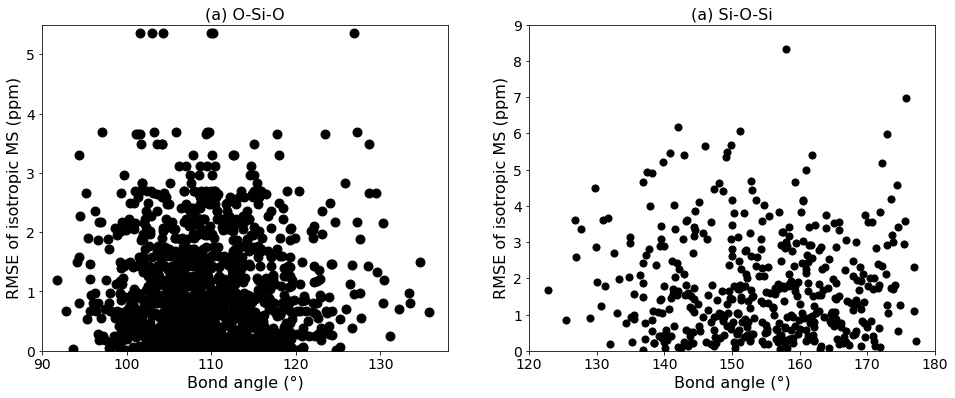

In [6]:
#Error distribution, angle,error
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML2/AM300K_error_angle_o_si_o.csv')
df2 = pd.read_csv('ML2/AM300K_error_angle_si_o_si.csv')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.scatter(df['angle'], df['Error'], s=80, color='black')
ax1.set_xlim(90,138)
ax1.set_ylim(0,5.5)
ax1.set_xlabel('Bond angle (\N{DEGREE SIGN})')
ax1.set_ylabel('RMSE of isotropic MS (ppm)')
ax1.set_title('(a) O-Si-O')

ax2.scatter(df2['angle'], df2['Error'], s=50, color='black')
ax2.set_xlim(120,180)
ax2.set_ylim(0,9)
ax2.set_xlabel('Bond angle (\N{DEGREE SIGN})')
ax2.set_ylabel('RMSE of isotropic MS (ppm)')
ax2.set_title('(a) Si-O-Si')

plt.savefig('Plots/angle_error.png')

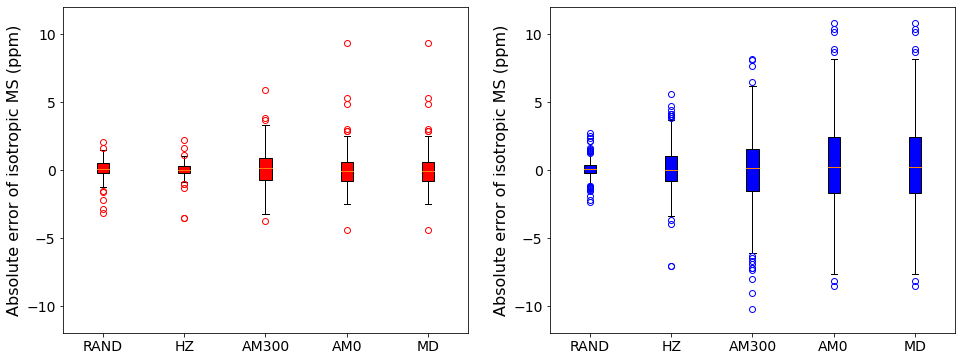

In [11]:
#Box plots
plt.style.use('2figure.mplstyle')

def species_splitter(target, predicted, spec):
    ids_o = []
    ids_si = []

    for i in enumerate(target):
        if i[1] < 350:
            ids_o.append(i[0])
        else:
            ids_si.append(i[0])
            
    o_tar = target[ids_o]
    o_pred = predicted[ids_o]
    
    si_tar = target[ids_si]
    si_pred = predicted[ids_si]
    o_er = np.array(o_tar) - np.array(o_pred)
    si_er = np.array(si_tar) - np.array(si_pred)
    
    
    if spec == 'O':
        return o_er
    else:
        return si_er


df = pd.read_csv('ML2/Rattle_raw_data.csv')
df2 = pd.read_csv('ML2/HypoZeo_raw_data.csv')
df3 = pd.read_csv('ML2/AM300K_raw_data.csv')
df4 = pd.read_csv('ML2/AM0K_raw_data.csv')
df5 = pd.read_csv('ML2/MD_raw_data.csv')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.boxplot(species_splitter(df['target'],df['predicted'],'Si'),
            positions = [1], labels=['RAND'],patch_artist=True,
            boxprops=dict(facecolor=Si_c),
            flierprops=dict(markeredgecolor=Si_c))
ax1.boxplot(species_splitter(df2['target'],df2['predicted'],'Si'),
            positions = [2], labels=['HZ'],patch_artist=True,
            boxprops=dict(facecolor=Si_c),
            flierprops=dict(markeredgecolor=Si_c))
ax1.boxplot(species_splitter(df3['target'],df3['predicted'],'Si'),
            positions = [3], labels=['AM300'],patch_artist=True,
            boxprops=dict(facecolor=Si_c),
            flierprops=dict(markeredgecolor=Si_c))
ax1.boxplot(species_splitter(df4['target'],df4['predicted'],'Si'),
            positions = [4], labels=['AM0'],patch_artist=True,
            boxprops=dict(facecolor=Si_c),
            flierprops=dict(markeredgecolor=Si_c))
ax1.boxplot(species_splitter(df5['target'],df5['predicted'],'Si'),
            positions = [5], labels=['MD'],patch_artist=True,
            boxprops=dict(facecolor=Si_c),
            flierprops=dict(markeredgecolor=Si_c))
ax1.set_ylim(-12,12)
ax1.set_ylabel('Absolute error of isotropic MS (ppm)')

ax2.boxplot(species_splitter(df['target'],df['predicted'],'O'),
         positions = [1], labels=['RAND'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
ax2.boxplot(species_splitter(df2['target'],df2['predicted'],'O'),
            positions = [2], labels=['HZ'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
ax2.boxplot(species_splitter(df3['target'],df3['predicted'],'O'),
            positions = [3], labels=['AM300'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
ax2.boxplot(species_splitter(df4['target'],df4['predicted'],'O'),
            positions = [4], labels=['AM0'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
ax2.boxplot(species_splitter(df5['target'],df5['predicted'],'O'),
            positions = [5], labels=['MD'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
ax2.set_ylim(-12,12)
ax2.set_ylabel('Absolute error of isotropic MS (ppm)')

plt.savefig('Plots/box_plots_all.png')

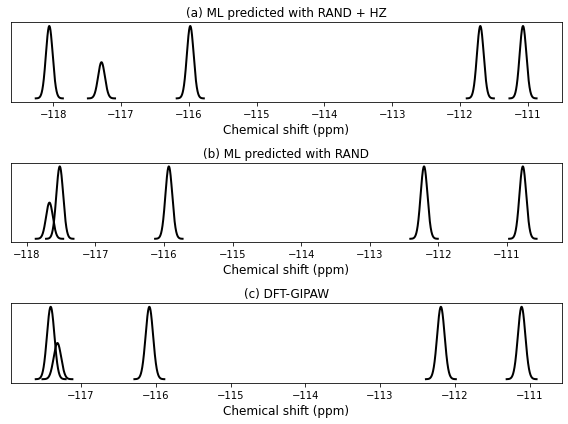

In [39]:
#What does error even mean....
df = pd.read_csv('ML2/NMR_spectra_data.csv')

from scipy.stats import norm

def gauss_plotter(center, height):
    x = np.linspace(center-0.2,center+0.2,1000)
    y = norm.pdf(x,center,0.05)
    y = y/np.ndarray.max(y)*height
    return x, y

def data_generator(data):
    data = np.unique(np.around(np.sort(data),2), return_counts=True)
    data_occ = data[1]/np.ndarray.max(data[1])
    sigma_ref = np.mean([-111.9,-112.3,-116.2,-116.5,-117.2] + data[0])
    data_dat = sigma_ref - data[0]
    data_tup = zip(data_occ, data_dat)
    return data_tup
    

exp_dat = [-111.9,-112.3,-116.2,-116.5,-117.2]
exp_occ = [1,1,1,0.5,1]
exp_tup = zip(exp_occ, exp_dat)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,6))

# for i in exp_tup:
#     x,y = gauss_plotter(i[1],i[0])
#     ax3.plot(x,y, color='black')
    
for i in data_generator(df['DFT']):
    x,y = gauss_plotter(i[1],i[0])
    ax3.plot(x,y, color='black')
ax3.set_yticks([])
ax3.set_xlabel('Chemical shift (ppm)')
ax3.set_title('(c) DFT-GIPAW')
    
for i in data_generator(df['Rattle']):
    x,y = gauss_plotter(i[1],i[0])
    ax2.plot(x,y, color='black')
ax2.set_yticks([])
ax2.set_xlabel('Chemical shift (ppm)')
ax2.set_title('(b) ML predicted with RAND')
    
for i in data_generator(df['Rattle + HypoZeo']):
    x,y = gauss_plotter(i[1],i[0])
    ax1.plot(x,y, color='black')
ax1.set_yticks([])
ax1.set_xlabel('Chemical shift (ppm)')
ax1.set_title('(a) ML predicted with RAND + HZ')

fig.tight_layout()

fig.savefig('Plots/NMR_spec_examples.png')

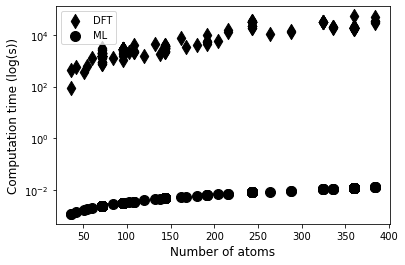

In [3]:
#Computation time
plt.style.use('1figure.mplstyle')

df = pd.read_csv('Comp Times/comp_times.csv')

tm_per_env = 0.000034
df['comp time ML'] = df['no at'] * tm_per_env


plt.scatter(df['no at'],df['comp time dft'],color='black', marker=Fer_m,label='DFT')
plt.scatter(df['no at'],df['comp time ML'], color='black', marker=Crist_m,label='ML')

plt.ylabel('Computation time (log(s))')
plt.xlabel('Number of atoms')
plt.yscale('log')
plt.legend()

plt.savefig('Plots/comp_time_master.png')

In [6]:
sum(df['comp time dft'])*2


4056953.779999999

In [ ]:
#R4

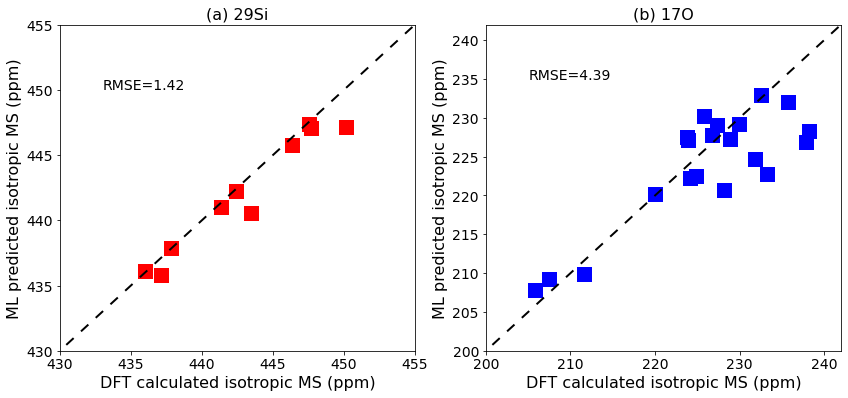

In [77]:
#single dataset 'Rattle' wrt Poly
plt.style.use('2figure.mplstyle')

df2 = pd.read_csv('ML2/Rattle_Si_wrt_poly.csv')
df = pd.read_csv('ML2/Rattle_O_wrt_poly.csv')
o_rmse = round(mean_squared_error(df['O tar'],df['O pred'],squared=False),2)
si_rmse = round(mean_squared_error(df2['Si tar'],df2['Si pred'],squared=False),2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(df2['Si tar'],df2['Si pred'],color=Si_c,marker=Rat_m)
ax1.set_xlim(430,455)
ax1.set_ylim(430,455)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')
ax1.set_title('(a) 29Si')
ax1.annotate('RMSE='+str(si_rmse), xy=(433,450)).set_fontsize(14)


ax2.scatter(df['O tar'],df['O pred'],color=O_c,marker=Rat_m)
ax2.set_xlim(200,242)
ax2.set_ylim(200,242)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')
ax2.set_title('(b) 17O')
ax2.annotate('RMSE='+str(o_rmse), xy=(205,235)).set_fontsize(14)

fig.savefig('Plots/Rattle_wrt_poly.png')

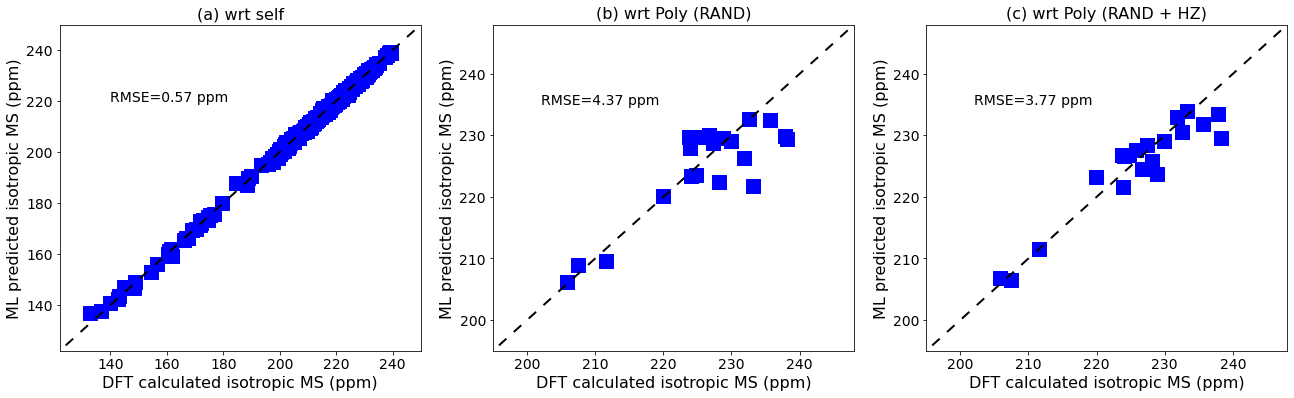

In [13]:
#Comp wrt to self, wrt to poly single, wrt poly pair
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML2/Rattle_wrt_poly_raw.csv')
df2 = pd.read_csv('ML2/Rattle_Plus_HypoZeo_wrt_poly_raw.csv')
df3 = pd.read_csv('ML2/Rattle_O_wrt_self.csv')


def species_splitter(target, predicted):
    ids_o = []
    ids_si = []

    for i in enumerate(target):
        if i[1] < 350:
            ids_o.append(i[0])
        else:
            ids_si.append(i[0])
            
    o_tar = target[ids_o]
    o_pred = predicted[ids_o]
    
    si_tar = target[ids_si]
    si_pred = predicted[ids_si]
    
    return o_tar, si_tar, o_pred, si_pred

o_tar_1, si_tar_1, o_pred_1, si_pred_1 = species_splitter(df['target'], df['predicted'])
o_tar_2, si_tar_2, o_pred_2, si_pred_2 = species_splitter(df2['target'], df2['predicted'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6))

ax1.scatter(df3['O tar'],df3['O pred'],color=O_c,marker=Rat_m)
ax1.set_xlim(122,250)
ax1.set_ylim(122,250)
ax1.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax1.set_xlabel('DFT calculated isotropic MS (ppm)')
ax1.set_ylabel('ML predicted isotropic MS (ppm)')
ax1.set_title('(a) wrt self')
ax1.annotate('RMSE='+str(0.57)+ ' ppm',
             xy=(140,220)).set_fontsize(14)

ax2.scatter(o_tar_1, o_pred_1,color=O_c,marker=Rat_m)
ax2.set_xlim(195,248)
ax2.set_ylim(195,248)
ax2.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax2.set_xlabel('DFT calculated isotropic MS (ppm)')
ax2.set_ylabel('ML predicted isotropic MS (ppm)')
ax2.set_title('(b) wrt Poly (RAND)')
ax2.annotate('RMSE='+str(4.37)+ ' ppm',
             xy=(202,235)).set_fontsize(14)

ax3.scatter(o_tar_2, o_pred_2,color=O_c,marker=Rat_m)
ax3.set_xlim(195,248)
ax3.set_ylim(195,248)
ax3.plot([1,1000],[1,1000],linestyle=lin, color='black')
ax3.set_xlabel('DFT calculated isotropic MS (ppm)')
ax3.set_ylabel('ML predicted isotropic MS (ppm)')
ax3.set_title('(c) wrt Poly (RAND + HZ)')
ax3.annotate('RMSE='+str(3.77)+ ' ppm',
             xy=(202,235)).set_fontsize(14)
plt.savefig('Plots/Comp_self_poly1_poly2_plot.png')

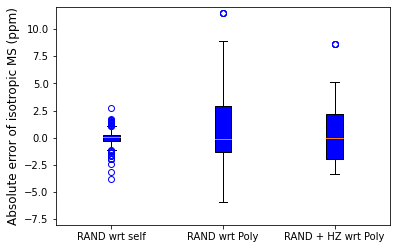

In [13]:
#Accompanying box plots to above
plt.style.use('1figure.mplstyle')
df = pd.read_csv('ML2/Rattle_wrt_poly_raw.csv')
df2 = pd.read_csv('ML2/Rattle_Plus_HypoZeo_wrt_poly_raw.csv')
df3 = pd.read_csv('ML2/Rattle_O_wrt_self.csv')
df3['error'] = df3['O tar'] - df3['O pred']

def species_splitter(target, predicted):
    ids_o = []
    ids_si = []

    for i in enumerate(target):
        if i[1] < 350:
            ids_o.append(i[0])
        else:
            ids_si.append(i[0])
            
    o_tar = target[ids_o]
    o_pred = predicted[ids_o]
    
    si_tar = target[ids_si]
    si_pred = predicted[ids_si]
    
    return o_tar, si_tar, o_pred, si_pred

o_tar_1, si_tar_1, o_pred_1, si_pred_1 = species_splitter(df['target'], df['predicted'])
o_tar_2, si_tar_2, o_pred_2, si_pred_2 = species_splitter(df2['target'], df2['predicted'])

df3['error'] = df3['O tar'] - df3['O pred']
o_error_1 = np.array(o_tar_1) - np.array(o_pred_1)
o_error_2 = np.array(o_tar_2) - np.array(o_pred_2)

plt.boxplot(df3['error'],
         positions = [1], labels=['RAND wrt self'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
plt.boxplot(o_error_1,
         positions = [2], labels=['RAND wrt Poly'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
plt.boxplot(o_error_2,
         positions = [3], labels=['RAND + HZ wrt Poly'],patch_artist=True,
            boxprops=dict(facecolor=O_c),
            flierprops=dict(markeredgecolor=O_c))
plt.ylim(-8,12)
plt.ylabel('Absolute error of isotropic MS (ppm)')

plt.savefig('Plots/Comp_self_poly1_poly2_box_plot.png')

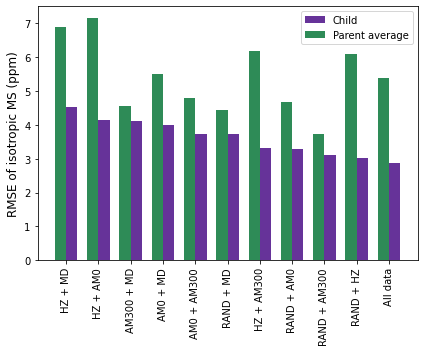

In [57]:
#Parents compared to Polys
plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/Learning_Poly_single_master.csv')
df2 = pd.read_csv('ML2/Learning_Poly_pairs_master.csv')
parent_error = []
labels = []

for i in df2['combos']:
    temp = []
    temp2 = []
    for l in df['combos']:
        if l[2:-3] in i:
            temp.append(float(df.loc[df['combos'] == l]['overall error']))
            if l[2:-3] == 'Rattle':
                temp2.append('RAND')
            elif l[2:-3] == 'HypoZeo':
                temp2.append('HZ')
            elif l[2:-3] == 'AM0K':
                temp2.append('AM0')                
            elif l[2:-3] == 'AM300K':
                temp2.append('AM300')
            elif l[2:-3] == 'MD_Distorted':
                temp2.append('MD')
                
                
    parent_error.append(sum(temp)/len(temp))
    labels.append(temp2)
df2['Parent error'] = parent_error

def labeller(i):
    return ' + '.join(i)
labels = list(map(labeller, labels))
df2['combos'] = labels    
df2.sort_values(by=['overall error'], inplace=True, ascending=False)

test = dict.fromkeys(df2.columns)
test['overall error'] = 2.88
test['Parent error'] = 5.40
test['combos'] = 'All data'
df2 = df2.append(test, ignore_index=True)
df2.head(20)

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6))


width = 0.35
x = np.arange(len(df2['combos']))
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.bar(x+width/2, df2['overall error'], width=width, label='Child', color=c_1)
ax.bar(x-width/2, df2['Parent error'], width=width, label='Parent average',color=c_2)


ax.set_xticks(x)
ax.set_xticklabels(df2['combos'])
ax.set_ylabel('RMSE of isotropic MS (ppm)')


plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.savefig('Plots/Poly_with_diff_parentas.png')

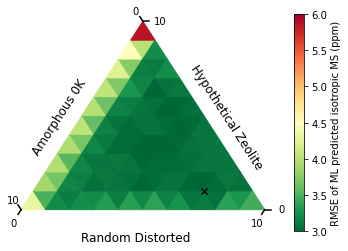

In [1]:
import ternary
scale = 10
figure, tax = ternary.figure(scale=scale)

file = open('ML2/data-Copy1.txt','r').readlines()
data = dict()
for i in file:
    i = i.split()
    data[(float(i[0])/10,float(i[1])/10,float(i[2])/10)] = float(i[3])
data

tax.heatmap(data,cmap='RdYlGn_r',vmin=3,vmax=6, cbarlabel='RMSE of ML predicted isotropic MS (ppm)')

tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple=10, offset=0.025)

fontsize = 12
offset = 0.1
tax.bottom_axis_label('Random Distorted', fontsize=fontsize, offset=offset)
tax.right_axis_label('Hypothetical Zeolite', fontsize=fontsize, offset=offset)
tax.left_axis_label('Amorphous 0K', fontsize=fontsize, offset=offset)

tax.get_axes().axis('off')
tax.line(min(data, key=data.get), min(data, key=data.get), marker='x', color='black')

tax.savefig('Plots/Data_mix_tern.png')



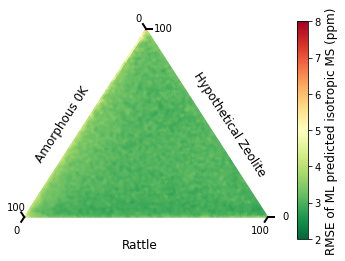

In [31]:
import ternary
scale = 100
figure, tax = ternary.figure(scale=scale)

file = open('ML2/data.txt','r').readlines()
data = dict()
for i in file:
    i = i.split()
    data[(float(i[0]),float(i[1]),float(i[2]))] = float(i[3])
data

tax.heatmap(data,cmap='RdYlGn_r',vmin=2,vmax=8, cbarlabel='RMSE of ML predicted isotropic MS (ppm)')

tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple=100, offset=0.025)

fontsize = 12
offset = 0.1
tax.bottom_axis_label('Rattle', fontsize=fontsize, offset=offset)
tax.right_axis_label('Hypothetical Zeolite', fontsize=fontsize, offset=offset)
tax.left_axis_label('Amorphous 0K', fontsize=fontsize, offset=offset)

tax.get_axes().axis('off')


tax.savefig('Plots/Data_mix_tern2.png')

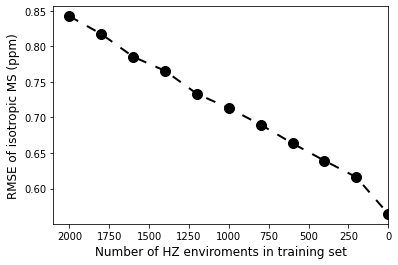

In [68]:
#Does mixing idea translate to specifci model
#Not really
plt.style.use('1figure.mplstyle')

df = pd.read_csv('ML2/Rattle_plus_HypoZeo_mixing_rmse.csv')
df['hz envs'] = 6000 - df['Rattle envs']


plt.plot(df['hz envs'], df['rmses'], marker='o', color='black', linestyle=lin)
plt.xlim(2100,0)

plt.xlabel('Number of HZ enviroments in training set')
plt.ylabel('RMSE of isotropic MS (ppm)')

plt.savefig('Plots/Rattle_HZ_wrf_self_mxing.png')

In [ ]:
#SAGPR

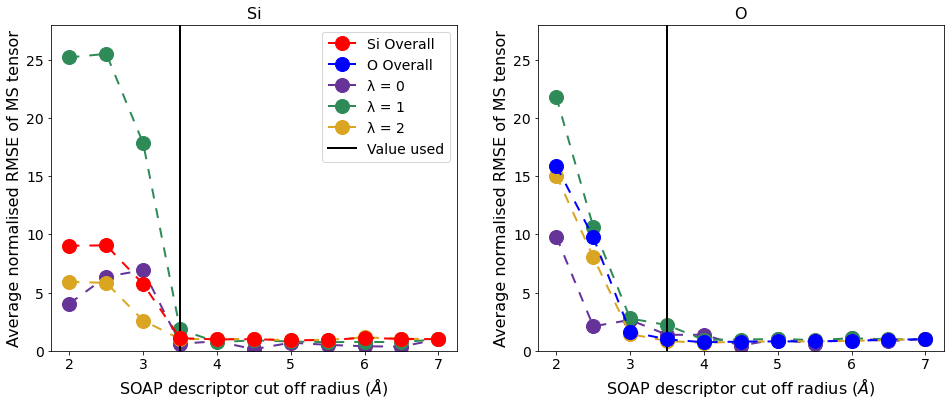

In [15]:
#r_cut
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML6/r_cut_rmses.csv')

col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['r cut'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
ax1.plot(df['r cut'], df['si rmse l0'], marker='o',
         color=c_1, linestyle=lin, label='λ = 0')
ax1.plot(df['r cut'], df['si rmse l1'], marker='o',
         color=c_2, linestyle=lin, label='λ = 1')
ax1.plot(df['r cut'], df['si rmse l2'], marker='o',
         color=c_3, linestyle=lin, label='λ = 2')

ax1.set_ylim(0,28)
ax1.plot([3.5,3.5],[-1,30], color='black', label='Value used')


ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('SOAP descriptor cut off radius ($\AA$)')
ax1.set_ylabel('Average normalised RMSE of MS tensor')

ax2.plot(df['r cut'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df['r cut'], df['o rmse l0'], marker='o',
         color=c_1, linestyle=lin)
ax2.plot(df['r cut'], df['o rmse l1'], marker='o',
         color=c_2, linestyle=lin)
ax2.plot(df['r cut'], df['o rmse l2'], marker='o',
         color=c_3, linestyle=lin)
ax2.set_ylim(0,28)
ax2.plot([3.5,3.5],[-1,30], color='black', label='Value used')


ax2.set_title('O')
ax2.set_xlabel('SOAP descriptor cut off radius ($\AA$)')
ax2.set_ylabel('Average normalised RMSE of MS tensor')

fig.savefig('Plots/SAGPR_r_cut.png')

In [59]:
df.head()

,Unnamed: 0,gauss,si rmse overall,o rmse overall,si rmse l0,o rmse l0,si rmse l1,o rmse l1,si rmse l2,o rmse l2
0,0,0.1,0.727351,0.582675,0.045602,0.104068,0.978570,0.825647,0.657887,0.546209
1,1,0.2,0.722878,0.416033,0.559335,0.610943,0.619649,0.719476,0.750860,0.376544
2,2,0.3,0.599241,0.406504,0.398242,0.340782,0.607247,0.807193,0.606368,0.360155
3,3,0.4,0.591759,0.375905,0.282222,0.460584,0.576369,0.665204,0.608473,0.356792
4,4,0.5,0.894411,0.446216,0.124602,0.052293,0.960800,0.816911,0.924538,0.395818


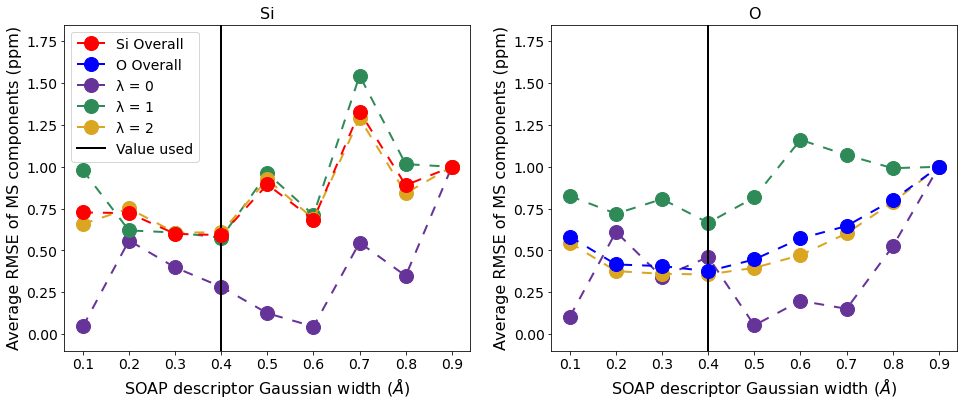

In [94]:
#gauss
plt.style.use('2figure.mplstyle')

df = pd.read_csv('ML6/gauss_rmses.csv')

col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['gauss'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
ax1.plot(df['gauss'], df['si rmse l0'], marker='o',
         color=c_1, linestyle=lin, label='λ = 0')
ax1.plot(df['gauss'], df['si rmse l1'], marker='o',
         color=c_2, linestyle=lin, label='λ = 1')
ax1.plot(df['gauss'], df['si rmse l2'], marker='o',
         color=c_3, linestyle=lin, label='λ = 2')

ax1.set_ylim(-0.1,1.85)
ax1.plot([0.4,0.4],[-1,30], color='black', label='Value used')


ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('SOAP descriptor Gaussian width ($\AA$)')
ax1.set_ylabel('Average normalised RMSE of MS tensor')

ax2.plot(df['gauss'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df['gauss'], df['o rmse l0'], marker='o',
         color=c_1, linestyle=lin)
ax2.plot(df['gauss'], df['o rmse l1'], marker='o',
         color=c_2, linestyle=lin)
ax2.plot(df['gauss'], df['o rmse l2'], marker='o',
         color=c_3, linestyle=lin)

ax2.set_ylim(-0.1,1.85)
ax2.plot([0.4,0.4],[-1,30], color='black', label='Value used')

ax2.set_title('O')
ax2.set_xlabel('SOAP descriptor Gaussian width ($\AA$)')
ax2.set_ylabel('Average RMSE of MS components (ppm)')

fig.savefig('Plots/SAGPR_gauss.png')

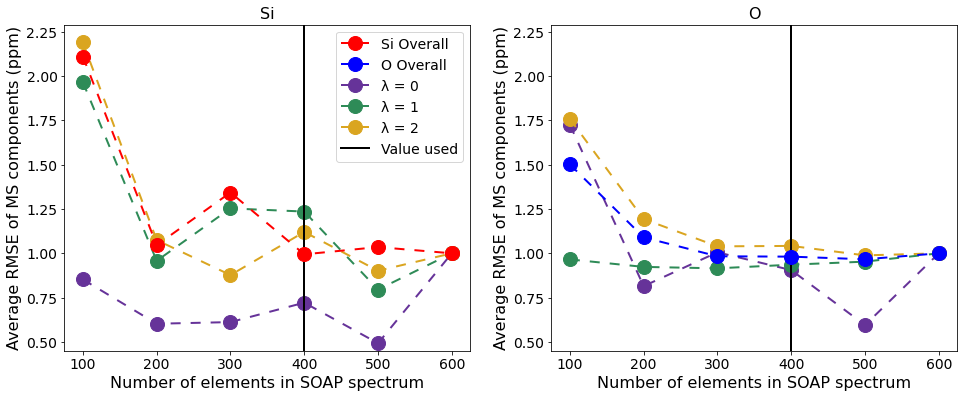

In [81]:
#nc
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML6/nc_rmses.csv')
col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['nc'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
ax1.plot(df['nc'], df['si rmse l0'], marker='o',
         color=c_1, linestyle=lin, label='λ = 0')
ax1.plot(df['nc'], df['si rmse l1'], marker='o',
         color=c_2, linestyle=lin, label='λ = 1')
ax1.plot(df['nc'], df['si rmse l2'], marker='o',
         color=c_3, linestyle=lin, label='λ = 2')

ax1.set_ylim(0.45,2.29)
ax1.plot([400,400],[-1,30], color='black', label='Value used')

ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('Number of elements in SOAP spectrum')
ax1.set_ylabel('Average RMSE of MS components (ppm)')

ax2.plot(df['nc'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df['nc'], df['o rmse l0'], marker='o',
         color=c_1, linestyle=lin)
ax2.plot(df['nc'], df['o rmse l1'], marker='o',
         color=c_2, linestyle=lin)
ax2.plot(df['nc'], df['o rmse l2'], marker='o',
         color=c_3, linestyle=lin)

ax2.set_ylim(0.45,2.29)
ax2.plot([400,400],[-1,30], color='black', label='Value used')

ax2.set_title('O')
ax2.set_xlabel('Number of elements in SOAP spectrum')
ax2.set_ylabel('Average RMSE of MS components (ppm)')

fig.savefig('Plots/SAGPR_nc.png')

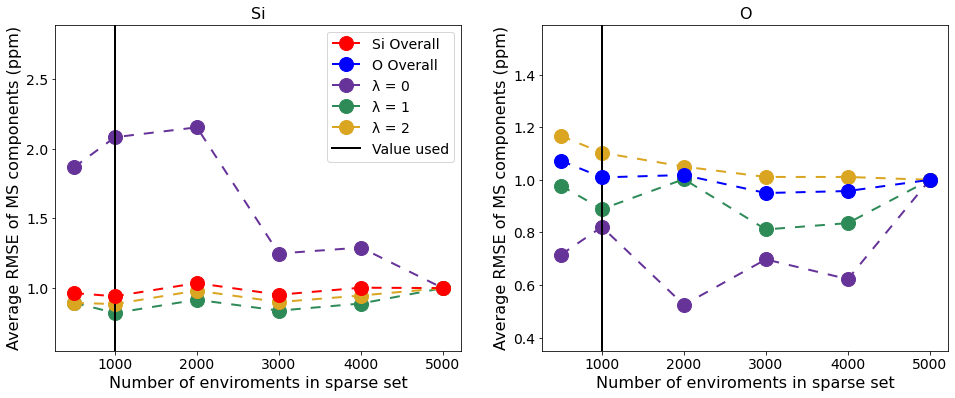

In [87]:
#sp_size
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML6/sp_size_rmses.csv')
col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['sp_size'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
ax1.plot(df['sp_size'], df['si rmse l0'], marker='o',
         color=c_1, linestyle=lin, label='λ = 0')
ax1.plot(df['sp_size'], df['si rmse l1'], marker='o',
         color=c_2, linestyle=lin, label='λ = 1')
ax1.plot(df['sp_size'], df['si rmse l2'], marker='o',
         color=c_3, linestyle=lin, label='λ = 2')

ax1.set_ylim(0.55,2.89)
ax1.plot([1000,1000],[-1,30], color='black', label='Value used')

ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('Number of enviroments in sparse set')
ax1.set_ylabel('Average RMSE of MS components (ppm)')

ax2.plot(df['sp_size'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df['sp_size'], df['o rmse l0'], marker='o',
         color=c_1, linestyle=lin)
ax2.plot(df['sp_size'], df['o rmse l1'], marker='o',
         color=c_2, linestyle=lin)
ax2.plot(df['sp_size'], df['o rmse l2'], marker='o',
         color=c_3, linestyle=lin)
ax2.set_ylim(0.35,1.59)
ax2.plot([1000,1000],[-1,30], color='black', label='Value used')
ax2.set_title('O')
ax2.set_xlabel('Number of enviroments in sparse set')
ax2.set_ylabel('Average RMSE of MS components (ppm)')

fig.savefig('Plots/SAGPR_sp_size.png')

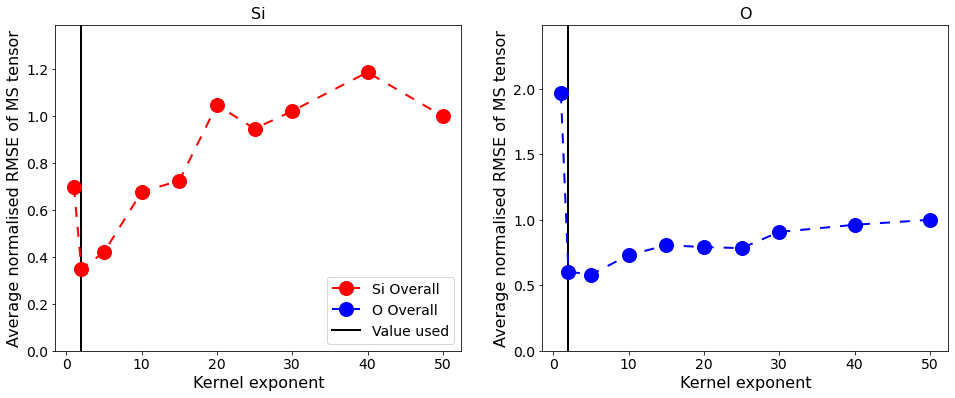

In [16]:
#ker_exp
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML6/ker_exp_rmses.csv')
col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['r cut'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
# ax1.plot(df['r cut'], df['si rmse l0'], marker='o',
#          color=c_1, linestyle=lin, label='λ = 0')
# ax1.plot(df['r cut'], df['si rmse l1'], marker='o',
#          color=c_2, linestyle=lin, label='λ = 1')
# ax1.plot(df['r cut'], df['si rmse l2'], marker='o',
#          color=c_3, linestyle=lin, label='λ = 2')

ax1.set_ylim(0,1.39)
ax1.plot([2,2],[-1,30], color='black', label='Value used')

ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('Kernel exponent')
ax1.set_ylabel('Average normalised RMSE of MS tensor')

ax2.plot(df['r cut'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
# ax2.plot(df['r cut'], df['o rmse l0'], marker='o',
#          color=c_1, linestyle=lin)
# ax2.plot(df['r cut'], df['o rmse l1'], marker='o',
#          color=c_2, linestyle=lin)
# ax2.plot(df['r cut'], df['o rmse l2'], marker='o',
#          color=c_3, linestyle=lin)
ax2.set_ylim(0,2.49)
ax2.plot([2,2],[-1,30], color='black', label='Value used')
ax2.set_title('O')
ax2.set_xlabel('Kernel exponent')
ax2.set_ylabel('Average normalised RMSE of MS tensor')

fig.savefig('Plots/SAGPR_ker_exp.png')

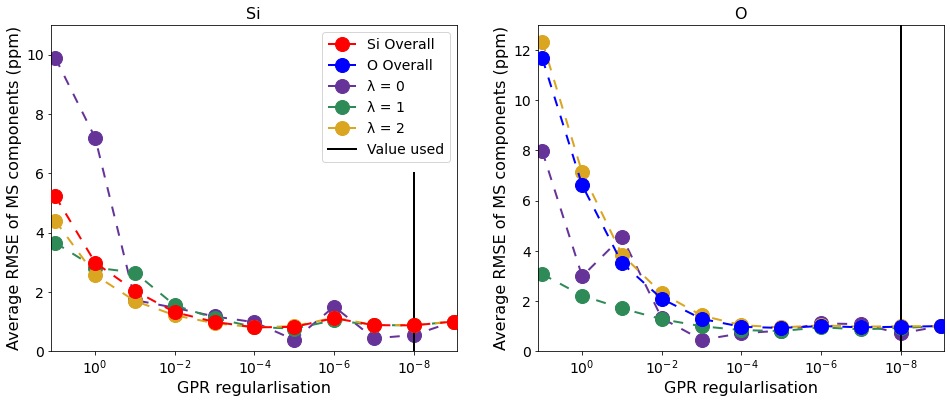

In [97]:
#reg
plt.style.use('2figure.mplstyle')
df = pd.read_csv('ML6/reg_rmses.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
df['reg'] = float(10)**df['reg']
col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

ax1.plot(df['reg'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
ax1.plot(df['reg'], df['si rmse l0'], marker='o',
         color=c_1, linestyle=lin, label='λ = 0')
ax1.plot(df['reg'], df['si rmse l1'], marker='o',
         color=c_2, linestyle=lin, label='λ = 1')
ax1.plot(df['reg'], df['si rmse l2'], marker='o',
         color=c_3, linestyle=lin, label='λ = 2')

ax1.set_ylim(0,11)
ax1.plot([1*10**-8,1*10**-8],[-1,6], color='black', label='Value used')

ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('GPR regularlisation')
ax1.set_ylabel('Average RMSE of MS components (ppm)')
ax1.set_xscale('log')
ax1.set_xlim(13,float(10.2)**-9)


ax2.plot(df['reg'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df['reg'], df['o rmse l0'], marker='o',
         color=c_1, linestyle=lin)
ax2.plot(df['reg'], df['o rmse l1'], marker='o',
         color=c_2, linestyle=lin)
ax2.plot(df['reg'], df['o rmse l2'], marker='o',
         color=c_3, linestyle=lin)

ax2.set_ylim(0,13)
ax2.plot([1*10**-8,1*10**-8],[-1,30], color='black', label='Value used')

ax2.set_title('O')
ax2.set_xlabel('GPR regularlisation')
ax2.set_ylabel('Average RMSE of MS components (ppm)')
ax2.set_xscale('log')
ax2.set_xlim(13,float(10.2)**-9)

fig.savefig('Plots/SAGPR_reg.png')

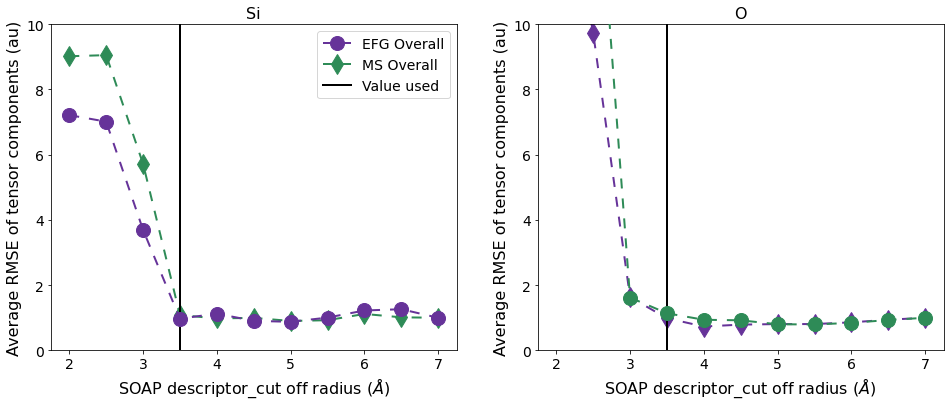

In [17]:
#EFG r_cut
#Maybe plot MS as well?
plt.style.use('2figure.mplstyle')


df = pd.read_csv('ML7/EFG_r_cut.csv')
col = ['si rmse overall','o rmse overall','si rmse l2','o rmse l2']
for i in col:
    df[i] = df[i]/df[i].iloc[-1]

    
df2 = pd.read_csv('ML6/r_cut_rmses.csv')
col = ['si rmse overall','o rmse overall','si rmse l0','o rmse l0',
       'si rmse l1','o rmse l1','si rmse l2','o rmse l2']
for i in col:
    df2[i] = df2[i]/df2[i].iloc[-1]



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(df['r_cut'], df['si rmse overall'], marker='o',
         color=c_1, linestyle=lin, label='EFG Overall', zorder=10)
# ax1.plot([], [], marker='o',
#          color=O_c, linestyle=lin, label='EFG Overall', zorder=10)

ax1.plot(df2['r cut'], df2['si rmse overall'], color=c_2, marker='d',
        linestyle=lin, label='MS Overall')



ax1.set_ylim(0,10)
ax1.plot([3.5,3.5],[-1,30], color='black', label='Value used')


ax1.legend(prop={'size': 14})
ax1.set_title('Si')
ax1.set_xlabel('SOAP descriptor_cut off radius ($\AA$)')
ax1.set_ylabel('Average normalised RMSE of MS tensor')

ax2.plot(df['r_cut'], df['o rmse overall'], marker='o',
         color=c_2, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df2['r cut'], df2['o rmse overall'], color=c_1, linestyle=lin, marker='d')

ax2.set_ylim(0,10)
ax2.plot([3.5,3.5],[-1,30], color='black', label='Value used')


ax2.set_title('O')
ax2.set_xlabel('SOAP descriptor_cut off radius ($\AA$)')
ax2.set_ylabel('Average normalised RMSE of MS tensor')

fig.savefig('Plots/SAGPR_EFG_MS_r_cut.png')

In [18]:
df.head(20)

,Unnamed: 0,r_cut,si rmse overall,o rmse overall,si rmse l2,o rmse l2
0,0,2.0,7.213791,35.865095,7.188472,35.776714
1,1,2.5,7.013207,16.778148,6.996722,16.756103
2,2,3.0,3.695106,1.619702,3.696834,1.623024
3,3,3.5,0.973416,1.139064,0.969296,1.140540
4,4,4.0,1.127025,0.938735,1.126859,0.939083
5,5,4.5,0.905427,0.922618,0.905534,0.923013
6,6,5.0,0.876590,0.801191,0.878800,0.879316
7,7,5.5,1.005795,0.795428,1.006620,0.796132
8,8,6.0,1.223462,0.844232,1.225567,0.844430
9,9,6.5,1.262719,0.931159,1.261754,0.933607


In [ ]:
#Function workflow

#Overall SA-GPR function workflow
#Functions build upon TENSOAP functions

#Configure shell enviroment
utils.env_configure()
#Generate input file far dataset RAND
inp_formatter('inp.xyz', 'RAND')
#Generate λ =0,1,2 SOAP spectrums for Si, O
#Use r_cut=3.5Å and sparsify using FPS to 400 elements
utils.get_ps_param('inp.xyz', [0,1,2], 400, 3.5)
#Apply FPS to find 1000 enviroments for sparse set
utils.env_sparse([0,1,2], 1000)
#Apply sparse selection to all power spectra
utils.apply_env_sparse([0,1,2])
#Generate all kernels using ker_exp=2
utils.kerneller(2)
#Train model for O with 3000 training points and reg=1e-8
#Make prediction and output to file
utils.model_trainer('O', 3000, '1e-8')

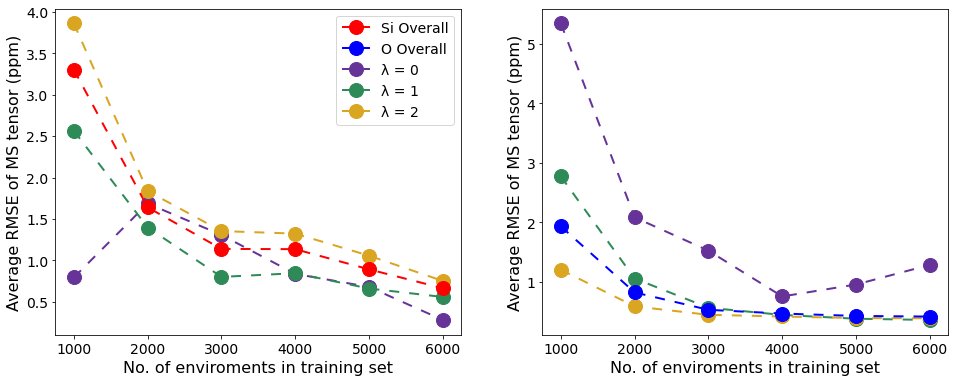

In [105]:
#MS learning curve 

plt.style.use('2figure.mplstyle')

df=pd.read_csv('ML6/learning curve_rmses.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))


ax1.plot(df['tr_size'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)
ax1.plot(df['tr_size'], df['si rmse l0'], marker='o',
         color=c_1, linestyle=lin, label='λ = 0')
ax1.plot(df['tr_size'], df['si rmse l1'], marker='o',
         color=c_2, linestyle=lin, label='λ = 1')
ax1.plot(df['tr_size'], df['si rmse l2'], marker='o',
         color=c_3, linestyle=lin, label='λ = 2')
ax1.legend(prop={'size': 14})
ax1.set_xlabel('No. of enviroments in training set')
ax1.set_ylabel('Average RMSE of MS tensor (ppm)')


ax2.plot(df['tr_size'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)
ax2.plot(df['tr_size'], df['o rmse l0'], marker='o',
         color=c_1, linestyle=lin)
ax2.plot(df['tr_size'], df['o rmse l1'], marker='o',
         color=c_2, linestyle=lin)
ax2.plot(df['tr_size'], df['o rmse l2'], marker='o',
         color=c_3, linestyle=lin)
ax2.set_xlabel('No. of enviroments in training set')
ax2.set_ylabel('Average RMSE of MS tensor (ppm)')

plt.savefig('Plots/MS_tens_learning_curve.png')

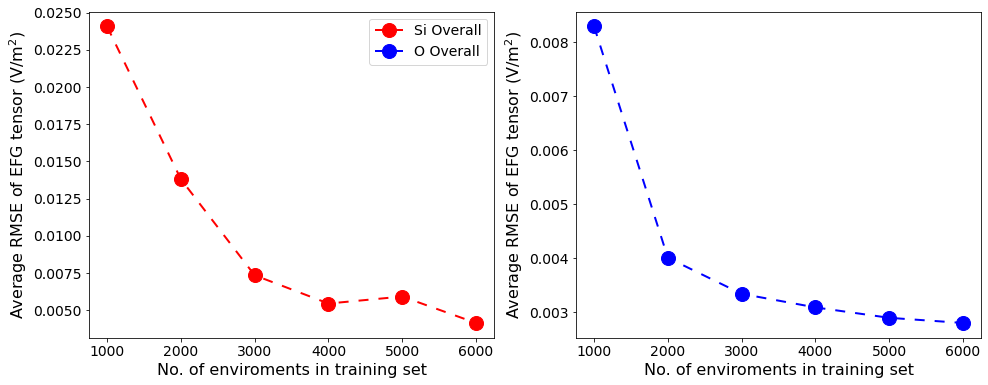

In [12]:
#Maybe should overlay MS and EFG instead?

#MS learning curve 

plt.style.use('2figure.mplstyle')

df=pd.read_csv('ML7/EFG_learning_curve.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))


ax1.plot(df['tr_size'], df['si rmse overall'], marker='o',
         color=Si_c, linestyle=lin, label='Si Overall', zorder=10)
ax1.plot([], [], marker='o',
         color=O_c, linestyle=lin, label='O Overall', zorder=10)

ax1.legend(prop={'size': 14})
ax1.set_xlabel('No. of enviroments in training set')
ax1.set_ylabel('Average RMSE of EFG tensor (V/m$^2$)')


ax2.plot(df['tr_size'], df['o rmse overall'], marker='o',
         color=O_c, linestyle=lin, label='Overall', zorder=10)

ax2.set_xlabel('No. of enviroments in training set')
ax2.set_ylabel('Average RMSE of EFG tensor (V/m$^2$)')

plt.savefig('Plots/EFG_tens_learning_curve.png')

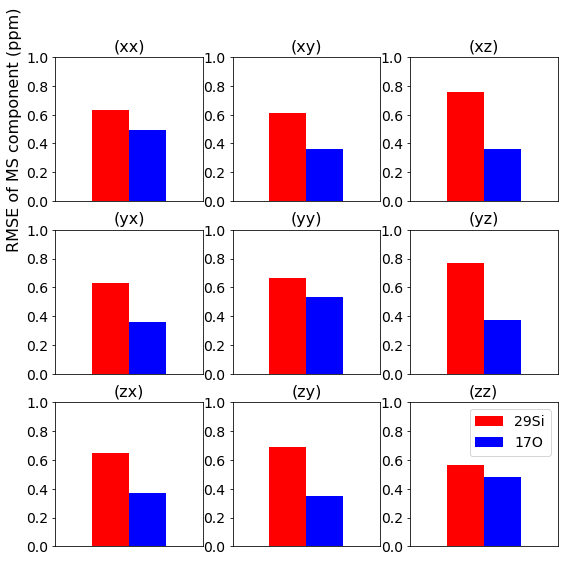

In [48]:
plt.style.use('2figure.mplstyle')

si_error = np.array([0.63188876, 0.61290819, 0.75371549, 0.63300309, 0.66591975,
       0.76917016, 0.65164619, 0.68871051, 0.56532003])

o_error = np.array([0.49371169, 0.35827581, 0.35991401, 0.36209716, 0.53393255,
       0.37236864, 0.36992886, 0.35158113, 0.48456298])

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, figsize=(9,9))

figs = [ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9]
labels = ['xx','xy','xz','yx','yy','yz','zx','zy','zz']
for i in figs:
    i.set_title('(' + labels[figs.index(i)] + ')')
    i.set_xlim(-1,1)
    i.set_ylim(0,1)
    i.set_xticks([])
    i.bar(-0.25, si_error[figs.index(i)], 0.5, color=Si_c, label='29Si')
    i.bar(0.25, o_error[figs.index(i)], 0.5, color= O_c, label='17O')
    
    if figs.index(i) in [0]:
        i.set_ylabel('RMSE of MS component (ppm)')
    if figs.index(i) in [8]:
        i.legend(prop={'size': 14})


fig.savefig('Plots/SAGPR_2d_error_ms.png')   






In [63]:
sum(o_error)/len(o_error)

0.18732429333333334

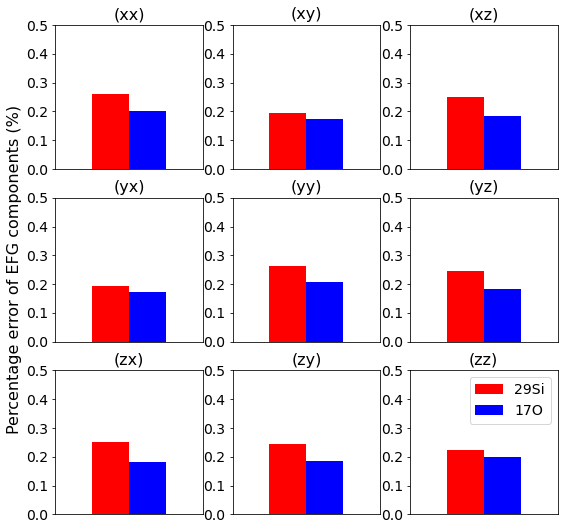

In [62]:
plt.style.use('2figure.mplstyle')

si_error = np.array([0.2601686 , 0.1941104 , 0.25009646, 0.1941104 , 0.2622943 ,
       0.24408597, 0.25009646, 0.24408597, 0.22461443])

o_error = np.array([0.20056182, 0.17198183, 0.18308047, 0.17198183, 0.20737352,
       0.18425765, 0.18308047, 0.18425765, 0.1993434 ])

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, figsize=(9,9))

figs = [ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9]
labels = ['xx','xy','xz','yx','yy','yz','zx','zy','zz']
for i in figs:
    i.set_title('(' + labels[figs.index(i)] + ')')
    i.set_xlim(-1,1)
    i.set_ylim(0,0.5)
    i.set_xticks([])
    i.bar(-0.25, si_error[figs.index(i)], 0.5, color=Si_c, label='29Si')
    i.bar(0.25, o_error[figs.index(i)], 0.5, color= O_c, label='17O')
    
    if figs.index(i) in [3]:
        i.set_ylabel('Percentage error of EFG components (%)')
    if figs.index(i) in [8]:
        i.legend(prop={'size': 14})


fig.savefig('Plots/SAGPR_2d_error_efg.png')   

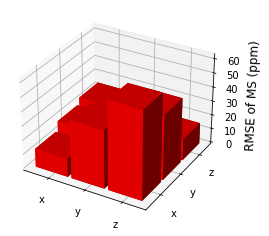

In [51]:
#3d bar MS (Si)
from mpl_toolkits.mplot3d import axes3d

plt.style.use('1figure.mplstyle')

si_error = np.array([0.63188876, 0.61290819, 0.75371549, 0.63300309, 0.66591975,
       0.76917016, 0.65164619, 0.68871051, 0.56532003])

si_per = si_error/abs(si_tar)


o_error = np.array([0.49371169, 0.35827581, 0.35991401, 0.36209716, 0.53393255,
       0.37236864, 0.36992886, 0.35158113, 0.48456298])

x = [1,2,3,1,2,3,1,2,3]
y = [3,3,3,2,2,2,1,1,1]
z = np.zeros(9)

dx = np.ones(9)- 0.1
dz = [1,2,3,4,5,6,7,8,9]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(x,y,z, dx,dx,si_per, color=Si_c)

ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(['x','y','z'])
ax1.set_yticks([1.5,2.5,3.5])
ax1.set_yticklabels(['x','y','z'])
ax1.set_zlabel('RMSE of MS (ppm)', rotation=90)

fig.savefig('Plots/MS_Si_3dbar.png')


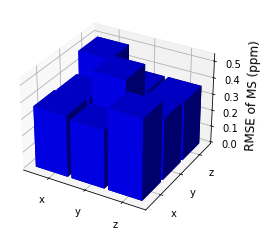

In [45]:
#3d bar MS (O)
from mpl_toolkits.mplot3d import axes3d

plt.style.use('1figure.mplstyle')

si_error = np.array([0.63188876, 0.61290819, 0.75371549, 0.63300309, 0.66591975,
       0.76917016, 0.65164619, 0.68871051, 0.56532003])
o_error = np.array([0.49371169, 0.35827581, 0.35991401, 0.36209716, 0.53393255,
       0.37236864, 0.36992886, 0.35158113, 0.48456298])

x = [1,2,3,1,2,3,1,2,3]
y = [3,3,3,2,2,2,1,1,1]
z = np.zeros(9)

dx = np.ones(9)- 0.1
dz = [1,2,3,4,5,6,7,8,9]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(x,y,z, dx,dx,o_error, color=O_c)

ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(['x','y','z'])
ax1.set_yticks([1.5,2.5,3.5])
ax1.set_yticklabels(['x','y','z'])
ax1.set_zlabel('RMSE of MS (ppm)', rotation=90)

fig.savefig('Plots/MS_O_3dbar.png')

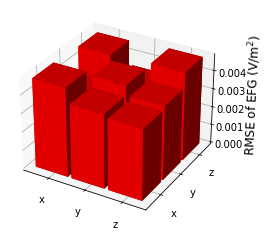

In [50]:
#3d bar EFG (Si)

from mpl_toolkits.mplot3d import axes3d

plt.style.use('1figure.mplstyle')

si_error = np.array([0.00467823, 0.00336005, 0.00480394, 0.00336005, 0.00451084,
       0.00400413, 0.00480394, 0.00400413, 0.00381956])
o_error = np.array([0.00292891, 0.00258925, 0.00275504, 0.00258925, 0.00305111,
       0.00276183, 0.00275504, 0.00276183, 0.00297509])

x = [1,2,3,1,2,3,1,2,3]
y = [3,3,3,2,2,2,1,1,1]
z = np.zeros(9)

dx = np.ones(9)- 0.1
dz = [1,2,3,4,5,6,7,8,9]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(x,y,z, dx,dx,si_error, color=Si_c)

ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(['x','y','z'])
ax1.set_yticks([1.5,2.5,3.5])
ax1.set_yticklabels(['x','y','z'])
ax1.set_zlabel('RMSE of EFG (V/m$^2$)', rotation=90)

fig.savefig('Plots/EFG_si_3dbar.png')

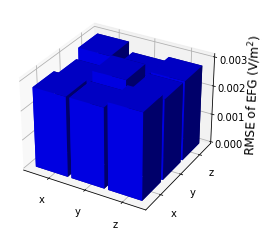

In [52]:
#3d bar EFG (O)

from mpl_toolkits.mplot3d import axes3d

plt.style.use('1figure.mplstyle')

si_error = np.array([0.00467823, 0.00336005, 0.00480394, 0.00336005, 0.00451084,
       0.00400413, 0.00480394, 0.00400413, 0.00381956])
o_error = np.array([0.00292891, 0.00258925, 0.00275504, 0.00258925, 0.00305111,
       0.00276183, 0.00275504, 0.00276183, 0.00297509])

x = [1,2,3,1,2,3,1,2,3]
y = [3,3,3,2,2,2,1,1,1]
z = np.zeros(9)

dx = np.ones(9)- 0.1
dz = [1,2,3,4,5,6,7,8,9]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(x,y,z, dx,dx,o_error, color=O_c)

ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(['x','y','z'])
ax1.set_yticks([1.5,2.5,3.5])
ax1.set_yticklabels(['x','y','z'])
ax1.set_zlabel('RMSE of EFG (V/m$^2$)', rotation=90)
ax1.set_zticks([0,0.001,0.002,0.003])

fig.savefig('Plots/EFG_O_3dbar.png')

In [ ]:
#Code appendices


In [ ]:

def ciffer():
    
    #Initially use cif2cell
    def cif2cell():
        raw_cifs = glob.glob('Cifs/Raw_Cifs/*.cif')

        for i in raw_cifs:

            process = subprocess.run('cif2cell ' + i + ' --program=castep -o ' + i[:-4] + '.cell', shell=True,
                                     stdout=subprocess.PIPE) #run cif2cell
            if process.returncode == 0:
                print('cif2cell succesful for ' + i)
                shutil.move(i, 'Cifs/Backup/')
                if os.path.exists(i[:-4] + '.cell'):
                    shutil.move(i[:-4] + '.cell', 'Cells/Raw Cells/') #move to raw cells file
                else:
                    print('no .cell found for ' + i)
            elif process.returncode != 0:
                print('cif2cell failed for ' + i)
    
    #Use c2x for any structures cif2cell failed on
    def c2x_cif():
        raw_cifs = glob.glob('Cifs/Raw_Cifs/*.cif')

        for i in raw_cifs:
            process = subprocess.run('c2x --cell '  + i + ' '+ i[:-4] + '.cell', shell=True,
                                     stdout=subprocess.PIPE) #run c2x
            if process.returncode == 0:
                print('c2x succesful for ' + i ) 
                shutil.move(i, 'Cifs/Backup/')
                if os.path.exists(i[:-4] + '.cell'):
                    shutil.move(i[:-4] + '.cell', 'Cells/Raw Cells/') #move to raw cells file
                else:
                    print('no .cell found for ' + i)
            elif process.returncode != 0:
                print('c2x failed for ' + i)
                os.remove(i[:-4] + '.cell')
                
    cif2cell()
    c2x_cif()
    
    return print('ciffing complete')

In [ ]:
#Reference dictionary / UID
#creates a dictionary with reference label and moves reindexed structure to main file + creates backup

def cell_index():
    raw_cells = glob.glob('Cells/Raw Cells/*')
    filtered = []
    
    if os.path.exists('uid_index.pkl'):#check if exists
        uid_dict = pickle.load(open('uid_index.pkl','rb')) #load dic if exists
    else:
        uid_dict = {} #otherwise initialise new dic
        uid_dict['1'] = 'ref' 
    
    for i in raw_cells:
        
        #check if file is already in backup hence being a duplicate
        if os.path.exists('Cells/Backup_Cells/' + i[16:]):
            print(i + ' is a dupicate skipping')
            os.remove(i)
        
        #else adding to dictionary
        else:  
            keys = list(uid_dict.keys())
            uid_dict[int(keys[-1])+1] = i[16:-5] #label as filename
            shutil.copyfile(i, 'Cells/UID Cells/' + str(int(keys[-1])+1) + '.cell')
            shutil.move(i, 'Cells/Backup_Cells/')
        
    pickle.dump(uid_dict,open('uid_index.pkl','wb')) #saving data structure as binary pickle object
    return uid_dict  

In [ ]:
#makes a directory for all uids in dic without one
#will print if no .cell found

def dir_maker():
    if os.path.exists('uid_index.pkl'):#check if exists
        uid_dict = pickle.load(open('uid_index.pkl','rb')) # load dic from pickle if exists
    else:
        print('no dic found')
        return
    
    #checks which directories have been made and which need to be made returning a list of UIDS to be made
    def keys_to_do(uid_dict):
        keys = list(uid_dict.keys())
        keys.remove('1')
        keys_to_do = []

        def filterer(keys):
            if os.path.exists('Main_Data/' + str(keys)):
                return False
            else:
                return True

        filtered = filter(filterer,keys)
        for i in filtered:
            keys_to_do.append(i)

        return keys_to_do
    
    keys_to_do = keys_to_do(uid_dict)
    
    #Create all dictionary and move .cell files to them
    for i in keys_to_do:
        os.mkdir('Main_Data/' + str(i))
        if os.path.exists('Cells/UID Cells/' + str(i) + '.cell'):
            shutil.copyfile('Cells/UID Cells/' + str(i) + '.cell', 'Main_Data/' + str(i) + '/' + str(i) + '.cell')
        else:
            print('no .cell found for :' + str(i))
            os.rmdir('Main_Data/' + str(i))

In [ ]:

def cell_corrector(k_space):    
    
    if os.path.exists('uid_index.pkl'):#check if exists
        uid_dict = pickle.load(open('uid_index.pkl','rb')) # load dic from pickle if exists
    else:
        print('no dic found')
        return    

    keys = list(uid_dict.keys())
    keys.remove('1')
    
    #reads in all .cell files
    for i in keys:
        cell = open('Main_Data/'+ str(i)+'/'+str(i)+'.cell', 'r')
        contents = cell.read()
        lines = contents.splitlines(True)


        if 'kpoints_mp_spacing' in contents: #check if already has a kpoints line
            for l in lines:  
                if 'kpoints_mp_spacing' in l:  
                    lines[lines.index(l)] = 'kpoints_mp_spacing ' + str(k_space) + '\n'
                    cell = open(f'Main_Data/'+ str(i)+'/'+str(i)+'.cell', 'w')
                    cell.writelines(lines)
                    cell.close()
        else: #else add in kpoints line
            cell = open('Main_Data/'+ str(i)+'/'+str(i)+'.cell', 'a')
            cell.write('\nkpoints_mp_spacing ' + str(k_space) + '\n')
            cell.close()

In [ ]:
#write or overwrite the param file for all structures.

def param_writer(e_cut, xc_functional):
    if os.path.exists('uid_index.pkl'):#check if exists
        uid_dict = pickle.load(open('uid_index.pkl','rb')) # load dic from pickle if exists
    else:
        print('no dic found')
        return    

    keys = list(uid_dict.keys())
    keys.remove('1')
    
    #Write param file for all structures
    for i in keys:
        param = open('Main_Data/'+ str(i)+'/'+str(i)+'.param', 'w')
        param.write('cut_off_energy ' + str(e_cut) + ' eV' + '\n'
                   + 'xc_functional ' + xc_functional + '\n'
                   + 'opt_strategy speed' + '\n'
                   + 'task magres' + '\n'
                   + 'magres_task nmr' + '\n'
                   + 'grid_scale 2' + '\n'
                   + 'data_distribution gvector' + '\n'
                   )
        param.close()

In [ ]:
#dry runner to check if everything works

def dry_runner():

    def runner(to_run): #to_run will be a list of UIDs we want to run
        for i in to_run:
            subprocess.run('castep.serial -d Main_Data/' + str(i) + 
                           '/' + str(i), shell=True)
            
    if os.path.exists('uid_index.pkl'):#check if exists
        uid_dict = pickle.load(open('uid_index.pkl','rb')) # load dic from pickle if exists
    else:
        return  print('no dic found')
    
    keys = list(uid_dict.keys())
    keys.remove('1')
    
    runner(keys)
    
    #test all structures with CASTEP dryrun
    for i in keys:
        if os.path.exists('Main_Data/' +str(i) + '/'+str(i)+ '.0001.err'):
            print('running error for ' +str(i))
            os.remove('Main_Data/' +str(i) + '/'+str(i)+ '.0001.err')
            
            uid_dict.pop(i) #removing values from dic that fail

        
        os.remove('Main_Data/'+str(i)+'/'+str(i)+'.castep')
    
    #output all ids that work
    os.rename('uid_index.pkl', 'uid_index_original.pkl')    
    pickle.dump(uid_dict, open('uid_index.pkl','wb'))